In [1]:
! pip install scipy
! pip install sklearn
! pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 MB 29.6 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 38.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.0/307.0 kB 13.2 MB/s eta 0:00:00
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1304 sha256=eb0d7657c8091cc5877c5a76eb33292741357f6c900bab7af41516c3fd82ce72
  Stored in directory: /home/ucloud/.cache/pip/wheels/e4/7b/98/b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 10.7 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 763.3/763.3 kB 23.8 MB/s eta 0:00:00


In [2]:
#imports
import nltk
nltk.download('vader_lexicon')
nltk.download('punkt')
import figs
import zipfile
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import time
import collections
import numpy as np
import csv

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/ucloud/nltk_data...
[nltk_data] Downloading package punkt to /home/ucloud/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [8]:
nobels = """Samuel Beckett
Saul Bellow
Winston Churchill
William Faulkner
John Galsworthy
William Golding
Nadine Gordimer
Knut Hamsun
Ernest Hemingway
Rudyard Kipling
Doris Lessing
Sinclair Lewis
Toni Morrison
Alice Munro
John Steinbeck
Rabindranath Tagore
Sigrid Undset
Patrick White""".split("\n")

In [4]:
# Chicago corpus extraction

In [5]:
archive = zipfile.ZipFile('chicago-corpus.zip','r')
# list of files
filist = archive.filelist
txtdata = str(archive.read('chicago-corpus/CHICAGO_CORPUS_NOVELS.csv'))
print(len(txtdata))
print(txtdata[:1000])

1039128
b'BOOK_ID,FILENAME,LIBRARIES,TITLE,AUTH_LAST,AUTH_FIRST,AUTH_ID,WRITTEN_AS,PUBL_CITY,PUBLISHER,PUBL_DATE,SOURCE,NATIONALITY,GENRE,CLEAN?,GENRE_2\r1,00000001.txt,152,Democracy,Adams,Henry,A_00017,,New York,Henry Holt & Co.,1880,g,American,,c,\r3,00000003.txt,56,The Stillwater tragedy,Aldrich,Thomas Bailey,A_00034,,Boston,Houghton Mifflin Co.,1880,g,American,,,\r13,00000013.txt,163,Louisiana,Burnett,Frances Hodgson,A_00486,,New York,Charles Scribner\'s Sons,1880,g,American,,,\r15,00000015.txt,56,The Grandissimes,Cable,George Washington,A_00512,,New York,Charles Scribner\'s Sons,1880,g,American,REAL,,\r21,00000021.txt,57,Hope Mills: or: Between friend and sweetheart,Douglas,Amanda M.,A_00984,,Boston,Lee & Shepard,1880,g,American,,,\r22,00000022.txt,57,The harvest of years,Ewell,M. L. B.,A_01111,,New York,G.P. Putnam\'s Sons,1880,g,American,,,\r37,00000037.txt,198,Confidence,James,Henry,A_01780,,Boston/Cambridge,"""Houghton, Osgood & Co.  The Riverside Press""",1880,g,American,REAL

In [6]:
c=0
for file in filist:
    if file.filename.endswith('.tei'): c+=1
c

9089

In [7]:
print(filist[10].filename)
#
#another = archive.read('chicago-corpus/texts_public/00000022.txt') #<< the harvest of the years 
another = archive.read('chicago-corpus/texts/clean00000022.tei') #<< the harvest of the years

chicago-corpus/texts/clean00000022.tei


In [8]:
# reading one exemplar 
#another = archive.read(filist[10].filename)
soup = BeautifulSoup(another, 'lxml')
print(soup.genre.getText())
titles_text = soup.text
print(titles_text[:50])


Religious|Domestic|Romance

Domestic|Religious|Romance






The harvest of years

Ewell, M. L. B.




1841


In [9]:
# author to text...

In [10]:
chicago_novels = str(archive.read('chicago-corpus/CHICAGO_CORPUS_NOVELS.csv'))
print(len(chicago_novels))
print(chicago_novels[:1200])
lines = chicago_novels.split('\\r')
reader = csv.reader(lines)
chicago_reader = list(reader)

1039128
b'BOOK_ID,FILENAME,LIBRARIES,TITLE,AUTH_LAST,AUTH_FIRST,AUTH_ID,WRITTEN_AS,PUBL_CITY,PUBLISHER,PUBL_DATE,SOURCE,NATIONALITY,GENRE,CLEAN?,GENRE_2\r1,00000001.txt,152,Democracy,Adams,Henry,A_00017,,New York,Henry Holt & Co.,1880,g,American,,c,\r3,00000003.txt,56,The Stillwater tragedy,Aldrich,Thomas Bailey,A_00034,,Boston,Houghton Mifflin Co.,1880,g,American,,,\r13,00000013.txt,163,Louisiana,Burnett,Frances Hodgson,A_00486,,New York,Charles Scribner\'s Sons,1880,g,American,,,\r15,00000015.txt,56,The Grandissimes,Cable,George Washington,A_00512,,New York,Charles Scribner\'s Sons,1880,g,American,REAL,,\r21,00000021.txt,57,Hope Mills: or: Between friend and sweetheart,Douglas,Amanda M.,A_00984,,Boston,Lee & Shepard,1880,g,American,,,\r22,00000022.txt,57,The harvest of years,Ewell,M. L. B.,A_01111,,New York,G.P. Putnam\'s Sons,1880,g,American,,,\r37,00000037.txt,198,Confidence,James,Henry,A_01780,,Boston/Cambridge,"""Houghton, Osgood & Co.  The Riverside Press""",1880,g,American,REAL

In [11]:
print(len(chicago_reader))

9090


In [12]:
for line in chicago_reader[:10]: print(line)
# authors: 4 & 5; year: 10

["b'BOOK_ID", 'FILENAME', 'LIBRARIES', 'TITLE', 'AUTH_LAST', 'AUTH_FIRST', 'AUTH_ID', 'WRITTEN_AS', 'PUBL_CITY', 'PUBLISHER', 'PUBL_DATE', 'SOURCE', 'NATIONALITY', 'GENRE', 'CLEAN?', 'GENRE_2']
['1', '00000001.txt', '152', 'Democracy', 'Adams', 'Henry', 'A_00017', '', 'New York', 'Henry Holt & Co.', '1880', 'g', 'American', '', 'c', '']
['3', '00000003.txt', '56', 'The Stillwater tragedy', 'Aldrich', 'Thomas Bailey', 'A_00034', '', 'Boston', 'Houghton Mifflin Co.', '1880', 'g', 'American', '', '', '']
['13', '00000013.txt', '163', 'Louisiana', 'Burnett', 'Frances Hodgson', 'A_00486', '', 'New York', "Charles Scribner\\'s Sons", '1880', 'g', 'American', '', '', '']
['15', '00000015.txt', '56', 'The Grandissimes', 'Cable', 'George Washington', 'A_00512', '', 'New York', "Charles Scribner\\'s Sons", '1880', 'g', 'American', 'REAL', '', '']
['21', '00000021.txt', '57', 'Hope Mills: or: Between friend and sweetheart', 'Douglas', 'Amanda M.', 'A_00984', '', 'Boston', 'Lee & Shepard', '1880',

In [13]:
def nobel_and_control(nobel_name, margin=1, corpus=chicago_reader, blacklist = nobels):

    nobel, control = [],[]
    nobel_year = 0
    for line in chicago_reader[1:]:

        first_last = line[5]+' '+line[4]
        year = int(line[10])

        if nobel_name in first_last: 
            nobel.append((first_last,line[1],line[3], line[-3], year, line[2]))
            nobel_year = int(year)

        elif nobel_year-margin<year<nobel_year+margin and first_last not in blacklist: 
            control.append((first_last,line[1],line[3], line[-3], year, line[2]))
            
    return nobel, control

In [14]:
nobel_name = 'Ernest Hemingway'

nobel, control = nobel_and_control(nobel_name)

In [15]:
len(control), len(nobel)

(170, 7)

In [16]:
#nobel
nobel_texts = {}
control_texts = {}

In [17]:
for nobel_name in nobels: 
    
    nobel_files, control_files = nobel_and_control(nobel_name)
    
    nobel_texts[nobel_name] = nobel_files
    control_texts[nobel_name] = control_files
    
    print(nobel_name)
    print(nobel_files)
    print(len(nobel_files), len(control_files))
    print()

Samuel Beckett
[('Samuel Beckett', '00011559.txt', 'Murphy', '', 1938, '26')]
1 32

Saul Bellow
[('Saul Bellow', '00010732.txt', 'Dangling man', 'MOD', 1944, '1152'), ('Saul Bellow', '00020085.txt', 'The adventures of Augie March', 'MOD', 1953, '2080'), ('Saul Bellow', '00020358.txt', 'Henderson the rain king', 'MOD', 1959, '150'), ('Saul Bellow', '00020531.txt', 'Herzog', 'MOD', 1963, '3017'), ('Saul Bellow', '00021237.txt', "Humboldt\\'s gift", 'MOD', 1975, '2926')]
5 228

Winston Churchill
[('Winston Churchill', '00001407.txt', 'Celebrity', '', 1897, '76'), ('Winston Churchill', '00002734.txt', 'Coniston', '', 1906, '624'), ('Winston Churchill', '00003212.txt', 'A modern chronicle', '', 1910, '63'), ('Winston Churchill', '00003818.txt', 'A far country', '', 1915, '689')]
4 125

William Faulkner
[('William Faulkner', '00010256.txt', "Soldiers\\' pay", 'MOD', 1926, '621'), ('William Faulkner', '00010268.txt', 'Mosquitoes', 'MOD', 1927, '609'), ('William Faulkner', '00010303.txt', 'The

In [18]:
# Now: take one, annotate, and compare. 

author = 'Alice Munro'

a, b = nobel_texts[author], control_texts[author]

nobel_directories = [e[1] for e in a]
control_directories = [e[1] for e in b]

In [19]:
len(control_directories), len(nobel_directories)

(2, 1)

In [48]:
# sentiments

! pip install spacy
! pip install spacytextblob
! python -m textblob.download_corpora

! python -m spacy download en_core_web_sm

start = time.time()
sent = "This is a terrible library"
blob = TextBlob(sent)
score = blob.sentiment_assessments.polarity
score
end = time.time()
print(end-start)

import spacy
nlp = spacy.load('en_core_web_sm')

#from spacytextblob.spacytextblob import SpacyTextBlob
nlp.add_pipe("spacytextblob")
start = time.time()
sent = "This is a terrible library"
doc = nlp(sent, disable=["tok2vec", "tagger", "parser", "attribute_ruler", "lemmatizer", 'textcat', 'ner'])
score = doc._.blob.polarity
score
end = time.time()
print(end-start)

start = time.time()
texts = ["I am tired", "Nobody likes me", "I don't hate you", "I love the sun", "Nothing makes sense anymore"]
for doc in nlp.pipe(texts, disable=["tok2vec", "tagger", "parser", "attribute_ruler", "lemmatizer", 'textcat', 'ner']): print(doc._.blob.polarity)
end = time.time()
print(end-start)

In [22]:
sia = SentimentIntensityAnalyzer()

In [24]:
start = time.time()

for directory in nobel_directories: 
    dir_no = directory.split('.')[0]
    attempt = archive.read('chicago-corpus/texts/clean'+dir_no+'.tei')
    soup = BeautifulSoup(attempt, 'lxml')
    title, author = soup.title.getText(), soup.author.persname.getText()
    print(title, author)
    text = soup.text
    
    #texts = nltk.sent_tokenize(text)    
    #arc_ = []
    #for doc in nlp.pipe(texts, disable=["tok2vec", "tagger", "parser", "attribute_ruler", "lemmatizer", 'textcat', 'ner']): arc_.append(doc._.blob.polarity)
    
    arc = figs.sentimarc_sid(text)
    H = figs.get_Hurst(arc)
    print(H)
    
    nobel_arcs[title+'_'+author] = arc
    nobel_H[title+'_'+author] = H
    
    

end = time.time()

print(f"Runtime of the program is {end - start}")

The progress of love Munro, Alice
0.63
Runtime of the program is 4.02391505241394


In [25]:
n, c = [e for e in nobel_H.values()], [e for e in control_H.values()]
np.mean(n), np.std(n), np.mean(c), np.std(c)

/opt/conda/lib/python3.9/site-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/opt/conda/lib/python3.9/site-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/conda/lib/python3.9/site-packages/numpy/core/_methods.py:264: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/opt/conda/lib/python3.9/site-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/opt/conda/lib/python3.9/site-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(0.63, 0.0, nan, nan)

In [26]:
nobel_arcs = {}
control_arcs = {}
nobel_H, control_H = {}, {}

In [27]:
start = time.time()

### let's loop it up.

for name in nobels:

    nobel_H_value, control_H_value = [], []

    print("\n\n")
    print(name)

    a, b = nobel_texts[name], control_texts[name]
    nobel_directories = [e[1] for e in a]
    control_directories = [e[1] for e in b]

    for directory in nobel_directories:
        dir_no = directory.split(".")[0]
        attempt = archive.read("chicago-corpus/texts/clean" + dir_no + ".tei")
        soup = BeautifulSoup(attempt, "lxml")
        title, author = soup.title.getText(), soup.author.persname.getText()
        text = soup.text

        arc = figs.sentimarc_sid(text)
        H = figs.get_Hurst(arc)
        print(author, title, H)

        nobel_arcs[title + "_" + author] = arc
        nobel_H[title + "_" + author] = H

        nobel_H_value.append(H)

    print("\n")
    for directory in control_directories[:]:
        dir_no = directory.split(".")[0]
        attempt = archive.read("chicago-corpus/texts/clean" + dir_no + ".tei")
        soup = BeautifulSoup(attempt, "lxml")
        title, author = soup.title.getText(), soup.author.persname.getText()
        text = soup.text

        arc = figs.sentimarc_sid(text)
        H = figs.get_Hurst(arc)
        print(author, title, H)

        control_arcs[title + "_" + author + "_controlfor_" + name] = arc
        control_H[title + "_" + author + "_controlfor_" + name] = H

        control_H_value.append(H)

    print(
        "\nThis nobel and control mean and std: Nobel: ",
        np.mean(nobel_H_value),
        np.std(nobel_H_value),
        "Control: ",
        np.mean(control_H_value),
        np.std(control_H_value),
    )

    n, c = [e for e in nobel_H.values()], [e for e in control_H.values()]
    print("\nMean and std all nobel, mean and std all control groups until now")
    print(np.mean(n), np.std(n), np.mean(c), np.std(c))

end = time.time()

print(f"Runtime of the program is {end - start}")




Samuel Beckett
Beckett, Samuel Murphy 0.52


Bentley, Phyllis Eleanor Sleep in peace 0.68
Cox, Anthony Berkeley Not to be taken 0.61
Day Lewis, Cecil The beast must die 0.57
Christie, Agatha Appointment with death 0.61
Stewart, Alfred Walter Murder will speak 0.58
Stewart, Alfred Walter Truth comes limping 0.58
Cooper, Lettice Ulpha National provincial 0.62
Forester, C. S. Flying colours 0.66
Firth, Violet Mary The sea priestess 0.59
Gibbons, Stella Nightingale wood 0.65
Heyer, Georgette A blunt instrument 0.53
Heyer, Georgette Royal escape 0.6
Hilton, James To you: Mr. Chips 0.64
Holtby, Winifred The crowded street 0.64
Hughes, Richard Arthur Warren In hazard 0.6
Wilkinson, Iris The godwits fly 0.53
Stewart, John Innes Mackintosh Lament for a maker 0.59
Kitchin, Clifford Henry Benn Birthday party 0.63
Linklater, Eric The impregnable women 0.67
Macdonell, Archibald Gordon Autobiography of a cad 0.62
error
Marsh, Ngaio Artists in crime 0.62
Marsh, Ngaio Death in a white tie 0.63
Mitc

In [29]:
print('done')

done


import json
with open("Chicago_Control_Hurst", "w") as outfile:
    json.dump(control_H,outfile) 

In [30]:
n, c = [e for e in nobel_H.values()], [e for e in control_H.values()]
print("\nMean and std all nobel, mean and std all control groups until now") 
print(np.mean(n), np.std(n), np.mean(c), np.std(c))


Mean and std all nobel, mean and std all control groups until now
0.5978823529411766 0.03381938593546463 0.6088603425559947 0.03844069052653322


In [31]:
from scipy.stats import ttest_ind

In [32]:
t_value, p_value = ttest_ind(n,c)
print(t_value, p_value)
p_value<0.05

-2.5760656209679853 0.010082106522430153


True

In [33]:
from scipy.stats import kstest
kstest(n, 'norm'), kstest(c, 'norm')

(KstestResult(statistic=0.6984682124530338, pvalue=4.699362575215678e-42),
 KstestResult(statistic=0.6951744048114, pvalue=0.0))

In [34]:
from scipy.stats import describe
print(describe(n))

DescribeResult(nobs=85, minmax=(0.52, 0.68), mean=0.5978823529411766, variance=0.0011573669467787114, skewness=-0.26265164659424756, kurtosis=-0.3683180468859142)


In [35]:
describe(c)

DescribeResult(nobs=1518, minmax=(0.43, 0.72), mean=0.6088603425559947, variance=0.0014786607729873906, skewness=0.12356211982280502, kurtosis=0.12540534262075909)

In [36]:
from scipy.stats import kstest
kstest(n, 'uniform')

KstestResult(statistic=0.52, pvalue=6.624964330085251e-22)

In [37]:
from scipy.stats import f_oneway
f_oneway(n,c)

F_onewayResult(statistic=6.636114083533355, pvalue=0.01008210652242902)

In [38]:
from scipy.stats import mannwhitneyu
stat, p = mannwhitneyu(n, c)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')

stat=55106.500, p=0.023
Probably different distributions


In [39]:
from scipy.stats import kruskal

stat, p = kruskal(n, c)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
	print('Probably the same distribution')
else:
	print('Probably different distributions')


stat=5.166, p=0.023
Probably different distributions


In [40]:
import random

In [73]:
thresh

-1

In [90]:
start = time.time()
difference = 0

t_values, p_values = [],[]

thresh = 200

while difference < 1: 
    random.shuffle(c)
    random.shuffle(n)
    t_value, p_value = ttest_ind(c[:thresh],c[thresh:thresh*2])
    
    ## replace the first c with n and enjoy the magic
    
    t_values.append(t_value)
    p_values.append(p_value)
    
    #print(t_value, p_value)
    #print(p_value<0.05)
    time_now = time.time()
    
    difference = time_now - start
    #print(difference)
    #print()
    
print(end-start)

-1267.4402236938477


In [91]:
t,f = 0,0
for p in p_values: 
    if p>=0.05: f+=1
    else: t+=1
    
print(t,f)

81 1556


In [1]:
#### turn it into a dataset?

data = """Samuel Beckett
Beckett, Samuel Murphy 0.52


Bentley, Phyllis Eleanor Sleep in peace 0.68
Cox, Anthony Berkeley Not to be taken 0.61
Day Lewis, Cecil The beast must die 0.57
Christie, Agatha Appointment with death 0.61
Stewart, Alfred Walter Murder will speak 0.58
Stewart, Alfred Walter Truth comes limping 0.58
Cooper, Lettice Ulpha National provincial 0.62
Forester, C. S. Flying colours 0.66
Firth, Violet Mary The sea priestess 0.59
Gibbons, Stella Nightingale wood 0.65
Heyer, Georgette A blunt instrument 0.53
Heyer, Georgette Royal escape 0.6
Hilton, James To you: Mr. Chips 0.64
Holtby, Winifred The crowded street 0.64
Hughes, Richard Arthur Warren In hazard 0.6
Wilkinson, Iris The godwits fly 0.53
Stewart, John Innes Mackintosh Lament for a maker 0.59
Kitchin, Clifford Henry Benn Birthday party 0.63
Linklater, Eric The impregnable women 0.67
Macdonell, Archibald Gordon Autobiography of a cad 0.62
error
Marsh, Ngaio Artists in crime 0.62
Marsh, Ngaio Death in a white tie 0.63
Mitchell, Gladys St. Peter's finger 0.6
Phillpotts, Eden Saurus 0.61
Priestley, J. B. The doomsday men 0.6
Stead, Christina House of all nations 0.59
Walpole, Hugh Mr. Perrin and Mr. Traill 0.62
Wheatley, Dennis The golden Spaniard 0.66
White, Ethel Lina Step in the dark 0.6
Wodehouse, P. G. Psmith journalist 0.58
Wodehouse, P. G. The code of the Woosters 0.55
Wright, Sydney Fowler The adventure of Wyndham Smith 0.54

This nobel and control mean and std: Nobel:  0.52 0.0 Control:  0.60625 0.037479160876412385

Mean and std all nobel, mean and std all control groups until now
0.52 0.0 0.60625 0.037479160876412385



Saul Bellow
error
Bellow, Saul Dangling man 0.55
Bellow, Saul The adventures of Augie March 0.62
Bellow, Saul Henderson the rain king 0.68
error
Bellow, Saul Herzog 0.63
Bellow, Saul Humboldt's gift 0.59


Brackett, Leigh No good from a corpse 0.58
Faust, Frederick Schiller Silvertip's chase 0.62
Faust, Frederick Schiller The fighting four 0.54
Burroughs, Edgar Rice Land of terror 0.58
error
Busch, Niven They dream of home 0.58
Chase, Allan The five arrows 0.55
Daly, Elizabeth Arrow pointing nowhere 0.59
Daly, Elizabeth The book of the dead 0.6
Eberhart, Mignon Good Escape the night 0.69
Fast, Howard Freedom road 0.6
Gardner, Erle Stanley Give 'em the ax 0.6
Gordon, Caroline The women on the porch 0.58
Hughes, Dorothy Belle Johnnie 0.6
Hughes, Dorothy Belle The delicate ape 0.58
Jackson, Charles The lost weekend 0.62
Lambert, Janet Whoa Matilda! 0.58
Lasswell, Mary High time 0.66
Millar, Kenneth The dark tunnel 0.61
MacInnes, Helen Rest and be thankful 0.62
MacInnes, Helen While still we live 0.64
McCloy, Helen Panic 0.61
Nin, Anais Under a glass bell 0.58
Powell, Dawn My home is far away 0.61
Powell, Richard All over but the shooting 0.57
Ross, Lillian Bos Blaze Allan 0.72
error
Seton, Anya Dragonwyck 0.64
Stout, Rex Not quite dead enough 0.61
Craig, Georgia Ann Randolph Jethro Hammer 0.68
Walker, Mildred Winter wheat 0.63
Williams, Ben Ames Leave her to heaven 0.67
Wilson, Dorothy Clarke The brothers 0.57
Winsor, Kathleen Forever Amber 0.68
error
Brand, Christianna Green for danger 0.63
error
De la Roche, Mazo The building of Jalna 0.63
Joyce, James Stephen hero 0.59
error
Chesterton, G. K. The paradoxes of Mr. Pond 0.56
Cheyney, Peter The dark street 0.62
Cheyney, Peter They never say when 0.61
Cheyney, Peter You'd be surprised 0.57
Christie, Agatha Death comes as the end 0.65
Christie, Agatha Towards zero 0.61
Compton-Burnett, Ivy Elders and betters 0.57
Stewart, Alfred Walter Jack-in-the-box 0.6
error
Montgomery, Robert Bruce The case of the gilded fly 0.6
Graham, Gwethalyn Earth and high heaven 0.55
Grove, Frederick Philip The master of the mill 0.61
Heyer, Georgette Friday's child 0.67
Lofts, Norah Jassy 0.6
Marsh, Ngaio Died in the wool 0.57
Maugham, W. Somerset The razor's edge 0.64
Renault, Mary The friendly young ladies 0.63
Shute, Nevil Pastoral 0.64
Stapledon, Olaf Sirius 0.63
Stead, Christina For love alone 0.63
Stevenson, Dorothy Emily Listening valley 0.65
Walmsley, Leo Foreigners 0.61
Wentworth, Patricia The clock strikes twelve 0.61
Whipple, Dorothy They were sisters 0.63
Bester, Alfred The demolished man 0.6
Bissell, Richard Pike 7 1/2 cents 0.53
error
Bradbury, Ray Fahrenheit 451 0.56
Brown, Fredric The lights in the sky are stars 0.61
error
Buck, Pearl S. Come: my beloved 0.59
Crane, Frances 13 white tulips 0.6
Crossen, Kendell Foster Once upon a star 0.63
Davis, Mildred B They buried a man 0.64
Eifert, Virginia Louise Snider Three rivers south 0.61
Evans, E. Everett Man of many minds 0.62
Fast, Howard The passion of Sacco and Vanzetti 0.62
Gardner, Erle Stanley The case of the hesitant hostess 0.66
Kornbluth, C. M. The Syndic 0.6
L'Amour, Louis Showdown at Yellow Butte 0.57
Lambert, Janet Welcome home: Mrs. Jordon 0.58
Lasswell, Mary Tooner Schooner 0.63
Leiber, Fritz The green millennium 0.59
Lesser, Milton The star seekers 0.6
Levin, Ira A kiss before dying 0.62
Lowndes, Robert W Mystery of the third mine 0.57
MacDonald, John D. Cancel all our vows 0.59
MacDonald, John D. The neon jungle 0.6
McCarthy, Mary The groves of Academe 0.58
Michener, James A. The bridges at Toko-ri 0.61
Miller, Henry Plexus 0.6
error
Nathan, Robert Gruntal The train in the meadow 0.6
Pangborn, Edgar West of the sun 0.63
Piper, H. Beam Murder in the gunroom 0.57
Queen, (House) The scarlet letters 0.57
Richter, Conrad The light in the forest 0.6
Shellabarger, Samuel Lord Vanity 0.68
Slaughter, Frank Gill The Galileans 0.66
Smith, Patrick D. The river is home 0.63
Sohl, Jerry Costigan's needle 0.6
Sohl, Jerry The transcendent man 0.59
Stout, Rex The golden spiders 0.56
Stuart, Jesse The beatinest boy 0.64
Sturgeon, Theodore More than human 0.56
Burroughs, William S. The naked lunch 0.58
Caldwell, Taylor Dear and glorious physician 0.67
Carr, John Dickson Scandal at High Chimneys 0.57
Cave, Hugh Barnett The cross on the drum 0.62
Coffman, Virginia Moura 0.61
Coker, Elizabeth Boatwright La belle 0.63
Condon, Richard The Manchurian candidate 0.6
Connell, Evan S. Mrs. Bridge 0.53
Dick, Philip K Time out of joint 0.59
Drury, Allen Advise and consent 0.7
Fast, Howard The Winston affair 0.64
Gantz, Kenneth Franklin Not in solitude 0.6
Gardner, Erle Stanley The case of the deadly toy 0.63
Gardner, Erle Stanley The case of the mythical monkeys 0.62
Heinlein, Robert A. Starship troopers 0.63
error
Humes, H. L. Men die 0.6
Kerouac, Jack Doctor Sax 0.67
Kerouac, Jack Maggie Cassidy 0.63
Kirkland, Elithe Hamilton Love is a wild assault 0.72
Latimer, Jonathan Black is the fashion for dying 0.61
Millar, Kenneth The Galton case 0.63
Manfred, Frederick Feikema Conquering Horse 0.63
Marshall, Paule Brown girl: brownstones 0.64
error
McBain, Ed Killers wedge 0.6
McBain, Ed King's ransom 0.58
Metalious, Grace Return to Peyton Place 0.59
Miller, Henry Nexus 0.61
Myers, John Myers Dead Warrior 0.58
Nin, Anais Children of the albatross 0.57
Powell, Richard Pioneer: go home! 0.62
Stern, Daniel Miss America 0.59
Stout, Rex Plot it yourself 0.58
Vale, Eugene The thirteenth apostle 0.62
Vonnegut, Kurt The sirens of Titan 0.63
Wollheim, Donald A The secret of the ninth planet 0.57
Buck, Pearl S. The living reed 0.63
Caldwell, Taylor Grandmother and the priests 0.67
Caldwell, Taylor The late Clara Beame 0.67
Calisher, Hortense Textures of life 0.55
Chappell, Fred It is time: Lord 0.55
Davis, Dorothy Salisbury Black sheep: white lamb 0.53
Delany, Samuel R Captives of the flame 0.61
Didion, Joan Run River 0.61
Ely, David Seconds 0.56
Gault, William Campbell Dead hero 0.54
Hughes, Dorothy Belle The expendable man 0.57
Jessup, Richard The Cincinnati Kid 0.62
Kerouac, Jack Visions of Gerard 0.55
L'Amour, Louis Catlow 0.62
L'Amour, Louis Fallon 0.59
MacDonald, John D. The drowner 0.55
MacInnes, Helen The Venetian affair 0.61
McBain, Ed Ten plus one 0.59
McCarthy, Mary The group 0.58
McMurtry, Larry Leaving Cheyenne 0.63
Mead, Shepherd "Dudley: there is no tomorrow! " "Then how about this afternoon?" 0.57
Michener, James A. Caravans 0.64
Palmer, Artis There's no place like Nome 0.6
Petrakis, Harry Mark The odyssey of Kostas Volakis 0.67
Plath, Sylvia The Bell Jar 0.57
Pynchon, Thomas V. 0.58
Rechy, John City of night 0.64
Linington, Elizabeth Double bluff 0.6
Linington, Elizabeth Run to evil 0.57
Stout, Rex The mother hunt 0.63
Tully, Andrew Supreme Court 0.57
Vonnegut, Kurt Cat's Cradle 0.53
Webb, Charles Richard The graduate 0.56
West, Morris The shoes of the fisherman 0.59
White, Claire Nicolas The death of the orange trees 0.57
Williams, Thomas A high new house 0.62
Berger, Thomas Sneaky people 0.58
Bergman, Andrew Hollywood and LeVine 0.58
Bester, Alfred The computer connection 0.57
Blevins, Winfred Charbonneau: man of two dreams 0.69
Boyar, Jane World class 0.61
Burns, Rex The Alvarez journal 0.53
Callenbach, Ernest Ecotopia 0.6
Clark, Mary Higgins Where are the children? 0.58
Clavell, James Shogun 0.68
Cline, C. Terry Damon 0.64
Crichton, Michael The great train robbery 0.57
Cummings, Ray Tarrano the Conqueror 0.64
De Felitta, Frank Audrey Rose 0.64
Doctorow, E. L. Ragtime 0.66
Dunning, John The Holland suggestions 0.61
Exley, Frederick Pages from a cold island 0.56
Foster, Alan Dean Midworld 0.62
Freeman, Cynthia A world full of strangers 0.64
error
Gaddis, William J R 0.72
Gifford, Thomas The wind chill factor 0.66
Gilman, Dorothy A nun in the closet 0.6
Gilman, Dorothy The clairvoyant countess 0.57
Gould, Heywood One Dead Debutante 0.56
Greenan, Russell H Heart of gold 0.65
Harington, Donald The architecture of the Arkansas Ozarks 0.61
Harris, Thomas Black Sunday 0.57
Herzog, Arthur Earthsound 0.58
Hoban, Russell Turtle diary 0.61
Hobson, Laura Z. Consenting adult 0.61
Jones, Gayl Corregidora 0.59
King, Stephen Salem's Lot 0.58
Koster, Richard Morton The dissertation 0.71
L'Amour, Louis Rivers west 0.58
Lowden, Desmond Bellman and True 0.51
McBain, Ed Blood relatives 0.65
McCloy, Helen Minotaur country 0.64
McCourt, James Mawrdew Czgowchwz 0.64
error
McMurtry, Larry Terms of endearment 0.62
Mertz, Barbara The sea king's daughter 0.63
Parker, Robert B. Mortal stakes 0.6
Philips, Judson Time of terror 0.53
Mertz, Barbara Crocodile on the sandbank 0.62
Rhodes, David Rock Island Line 0.63
Rossner, Judith Looking for Mr. Goodbar 0.6
Salter, James Light years 0.6
error
Schmidt, Stanley Newton and the quasi-apple 0.63
Shaara, Michael The killer angels 0.62
Silverberg, Robert The stochastic man 0.63
Smith, Charles William Country music 0.61
Stasheff, Christopher The warlock in spite of himself 0.59
Stebel, S. L The Vorovich affair 0.59
Torres, Edwin Carlito's way 0.52
Van Slyke, Helen The mixed blessing 0.63
Wambaugh, Joseph The choirboys 0.54
Westlake, Donald E Two much 0.6
Wilcox, Collin Aftershock 0.6
Yates, Richard Disturbing the peace 0.61
Heyer, Georgette My Lord John 0.61
Macdonald, Malcolm The world from rough stones 0.63
Naipaul, Vidiadhar Surajprasad Guerrillas 0.6
Rendell, Ruth Shake hands forever 0.59

This nobel and control mean and std: Nobel:  0.614 0.04317406628984581 Control:  0.6065789473684211 0.038132477923368394

Mean and std all nobel, mean and std all control groups until now
0.5983333333333333 0.05273097339852126 0.6065384615384616 0.03805282842942546



Winston Churchill
Churchill, Winston Celebrity 0.54
Churchill, Winston Coniston 0.63
Churchill, Winston A modern chronicle 0.61
Churchill, Winston A far country 0.6


Crane, Stephen The third violet 0.56
Davis, Rebecca Harding Frances Waldeaux 0.56
Davis, Richard Harding Soldiers of fortune 0.62
De Mille, James Cord and creese 0.67
Evans, Augusta J. Vashti 0.59
Fitch, Clyde The smart set 0.67
Freeman, Mary Eleanor Wilkins Jerome: a poor man 0.69
Goodwin, Maud Wilder Flint 0.59
Green, Anna Katharine That affair next door 0.57
error
James, Henry What Maisie knew 0.55
Lewis, Alfred Henry Wolfville 0.55
Lynde, Francis A romance in transit 0.59
Read, Opie Percival Old Ebenezer 0.55
Richards, Laura Elizabeth Howe Captain January 0.58
Stephens, Robert Neilson An enemy to the king 0.62
Wilson, Anna May The days of Mohammed 0.59
Deland, Margaret The awakening of Helena Richie 0.55
Eliot, Charles William Four American leaders 0.68
Ford, Sewell Shorty McCabe 0.58
error
Fox, John A knight of the Cumberland 0.56
Freeman, Mary Eleanor Wilkins By the light of the soul 0.65
Gale, Zona Romance Island 0.61
Glasgow, Ellen Anderson Gholson The wheel of life 0.64
Green, Anna Katharine The woman in the alcove 0.62
Green, Anna Katharine The chief legatee 0.54
Green, Anna Katharine The Leavenworth case 0.58
Harte, Bret Drift from two shores 0.62
Hopkins, Herbert M. The mayor of Warwick 0.63
Johnston, Annie F. The Little Colonel's Christmas vacation 0.68
King, Charles Tonio 0.6
Caldwell, Fannie The lady of the decoration 0.59
London, Jack Before Adam 0.61
Long, John Luther The way of the gods 0.6
Lorimer, George Horace The false gods 0.65
MacGrath, Harold Half a rogue 0.61
Machen, Arthur The house of souls 0.62
McCutcheon, George Barr Jane Cable 0.67
error
Moore, John Trotwood The bishop of Cottontown 0.66
Parrish, Randall Bob Hampton of Placer 0.67
Phillips, David Graham The fortune hunter 0.57
Reed, Myrtle A spinner in the sun 0.57
Remington, Frederic The way of an Indian 0.58
Scott, John Reed The colonel of the Red huzzars 0.54
Smith, Alice Prescott Montlivet 0.6
Spearman, Frank H. Whispering Smith 0.71
Turner, Ethel Sybil In the mist of the mountains 0.61
Walcott, Earle Ashley Blindfolded 0.62
Warner, Anne Seeing France with Uncle John 0.55
Warner, Anne Susan Clegg and her neighbors' affairs 0.58
White, William Allen In our town 0.63
Wister, Owen Lady Baltimore 0.59
Cooke, Grace MacGowan The power and the glory 0.61
Curwood, James Oliver The danger trail 0.67
Daviess, Maria Thompson The road to Providence 0.57
Davis, Richard Harding Once upon a time 0.64
Davis, Richard Harding The scarlet car 0.6
Deland, Margaret The way to peace 0.62
Freeman, Mary Eleanor Wilkins The green door 0.56
Baker, Ray Stannard Adventures in friendship 0.62
Green, Anna Katharine The house of the whispering pines 0.63
Grey, Zane The Heritage of the desert 0.57
error
Grey, Zane The young forester 0.59
Harben, Will N. Dixie Hart 0.58
Henry, O. Whirligigs 0.58
Henry, O. Strictly business 0.6
Hough, Emerson The purchase price 0.7
James, Henry The finer grain 0.68
King, Basil The wild olive 0.63
Landis, Frederick The angel of Lonesome Hill 0.53
Laut, Agnes C. The freebooters of the wilderness 0.56
Lincoln, Joseph Crosby The depot master 0.56
London, Jack Burning Daylight 0.64
London, Jack Lost Face 0.55
MacGrath, Harold A splendid hazard 0.61
McCarter, Margaret Hill The price of the prairie 0.65
McCutcheon, George Barr The rose in the ring 0.64
McElroy, John Si Klegg 0.64
Mulford, Clarence Edward Hopalong Cassidy 0.61
Nicholson, Meredith The siege of the seven suitors 0.56
error
Parrish, Randall Keith of the border 0.61
Patchin, Frank Gee The pony rider boys in Texas 0.6
Phelps, Elizabeth Stuart A chariot of fire 0.59
Reed, Myrtle Master of the vineyard 0.62
Rinehart, Mary Roberts The window at the White Cat 0.59
Sinclair, Upton Samuel the seeker 0.66
Sullivan, May Kellogg The trail of a sourdough 0.63
Wiggin, Kate Douglas Smith Rebecca of Sunnybrook farm 0.55
Curwood, James Oliver God's country and the woman 0.62
Daviess, Maria Thompson Over Paradise ridge 0.6
Davis, Richard Harding Somewhere in France 0.62
Day, Holman Francis The landloper 0.61
Dixon, Thomas The foolish virgin 0.68
Eaton, Walter Prichard The idyl of Twin Fires 0.63
Emerson, Alice B Ruth Fielding on Cliff Island 0.67
error
England, George Allan The air trust 0.64
Ferber, Edna Emma McChesney & co. 0.57
Glaspell, Susan Fidelity 0.62
Glass, Montague The competitive nephew 0.59
Goddard, Charles The perils of Pauline 0.61
error
Baker, Ray Stannard Hempfield 0.63
Green, Anna Katharine The golden slipper 0.63
Grey, Zane The rainbow trail 0.64
Hope, (House) The Bobbsey twins on a houseboat 0.58
James, Henry The Coxon fund 0.57
James, Henry The altar of the dead 0.57
Caldwell, Fannie The house of the misty star 0.62
Lockhart, Caroline The man from the bitter roots 0.62
London, Jack The scarlet plague 0.6
Machen, Arthur The angels of Mons 0.61
Machen, Arthur The great return 0.55
Morris, Elisabeth Woodbridge More Jonathan papers 0.66
McCue, Nora Bryant Still Jim 0.59
error
Norris, Kathleen Thompson The story of Julia Page 0.64
O'Brien, Howard Vincent Thirty 0.61
Parrish, Randall Beyond the frontier 0.65
Porter, Eleanor H. Pollyanna grows up 0.58
Quick, Herbert The Brown Mouse 0.58
Reeve, Arthur B. The war terror 0.63
Rives, Amelie Shadows of flames 0.65
White, Stewart Edward The gray dawn 0.57
Wilson, Harry Leon Ruggles of Red Gap 0.65
Farnol, Jeffery Beltane the smith 0.67
Lawrence, D. H. The rainbow 0.69
error
Powys, John Cowper Wood and stone 0.63
Richardson, Dorothy Pilgrimage Volume 1 (Pointed Roofs) 0.6

This nobel and control mean and std: Nobel:  0.595 0.03354101966249683 Control:  0.61 0.03965854258542541

Mean and std all nobel, mean and std all control groups until now
0.597 0.046054315758677807 0.6076623376623377 0.03861552422819677



William Faulkner
Faulkner, William Soldiers' pay 0.59
Faulkner, William Mosquitoes 0.57
Faulkner, William The sound and the fury 0.6
Faulkner, William As I lay dying 0.64
Faulkner, William Three famous short novels 0.63
Faulkner, William Light in August 0.62
Faulkner, William The Unvanquished 0.55
Faulkner, William Pylon 0.59
Faulkner, William "Absalom, Absalom!" 0.63
Faulkner, William The wild palms 0.59
Faulkner, William The hamlet 0.64
Faulkner, William Go Down Moses 0.59
Faulkner, William Intruder in the dust 0.56
Faulkner, William The town 0.55
Faulkner, William The reivers 0.57


Ferber, Edna Show boat 0.62
Hill, Grace Livingston Coming through the rye 0.59
North, Grace May Nan of the Gypsies 0.64
Rinehart, Mary Roberts Nomad's land 0.6
Rinehart, Mary Roberts Tish plays the game 0.53
Roberts, Elizabeth Madox The time of man 0.66
Tully, Jim Jarnegan 0.64
Wright, Willard Huntington The Benson murder case 0.61
Glaspell, Susan A jury of her peers 0.55
Hill, Grace Livingston Job's niece 0.65
Hill, Grace Livingston The white flower 0.6
Keeler, Harry Stephen Find the clock 0.62
Rolvaag, Ole Giants in the earth 0.63
Sinclair, Upton Oil! 0.6
Tully, Jim Circus parade 0.68
Wright, Willard Huntington The Canary murder case 0.58
Van Dyke, Henry Fisherman's luck and some other uncertain things 0.67
Wharton, Edith Twilight sleep 0.62
Wilder, Thornton The bridge of San Luis Rey 0.63
Yezierska, Anzia Arrogant beggar 0.66
error
Footner, Hulbert A self-made thief 0.58
Gissing, George Eve's Ransom 0.58
Glasgow, Ellen Anderson Gholson They stooped to folly 0.63
Hammett, Dashiell The Dain curse 0.63
Hill, Grace Livingston The prodigal girl 0.71
Keeler, Harry Stephen The spectacles of Mr. Cagliostro 0.63
Kline, Otis Adelbert The planet of peril 0.63
La Farge, Oliver Laughing Boy 0.61
Lovelace, Maud Hart Early candlelight 0.64
Meigs, Cornelia Master Simon's garden 0.61
error
Nordhoff, Charles Falcons of France 0.59
Queen, (House) The Roman hat mystery 0.6
Rinehart, Mary Roberts The romantics 0.57
Smedley, Agnes Daughter of earth 0.65
Smith, Thorne The stray lamb 0.54
Thurman, Wallace The blacker the berry 0.59
Wharton, Edith Hudson river bracketed 0.63
Wolfe, Thomas Look homeward: angel 0.66
Ferber, Edna Cimarron 0.6
Hammett, Dashiell The Maltese falcon 0.61
Hill, Grace Livingston Ladybird 0.65
Hill, Grace Livingston The gold shoe 0.67
Hughes, Langston Not without laughter 0.58
Keeler, Harry Stephen The amazing web 0.62
Keeler, Harry Stephen The fourth king 0.61
error
Kline, Otis Adelbert Maza of the moon 0.65
Kline, Otis Adelbert The prince of peril 0.6
Mackenzie, Jean Kenyon The trader's wife 0.57
Queen, (House) The French powder mystery 0.67
Roberts, Elizabeth Madox The great meadow 0.65
Wilder, Thornton The woman of Andros 0.55
Fauset, Jessie Redmon The chinaberry tree 0.63
error
Ferber, Edna American beauty 0.58
Gibbs, Sally Beauty for ashes 0.69
Hammett, Dashiell The glass key 0.52
Hill, Grace Livingston Kerry 0.63
Hill, Grace Livingston Silver wings 0.62
Hill, Grace Livingston The chance of a lifetime 0.66
Hurst, Fannie Back street 0.64
Jenkins, Will Murder madness 0.61
March, William Company K 0.63
Merritt, Abraham The face in the abyss 0.58
Palmer, Stuart The penguin pool murder 0.6
Queen, (House) The Dutch shoe mystery 0.66
Roberts, Kenneth Lewis The Lively lady 0.62
Schuyler, George S. Black no more 0.56
Smith, Thorne The night life of the gods 0.59
Smith, Thorne Turnabout 0.58
Tarkington, Booth The gentlemen from Indiana 0.69
Taylor, Phoebe Atwood The Cape Cod mystery 0.61
Tully, Jim Blood on the moon 0.67
West, Nathanael The dream life of Balso Snell 0.66
Whitfield, Raoul Death in a bowl 0.59
Fitzgerald, Zelda Save me the waltz 0.6
Hill, Grace Livingston Happiness hill 0.68
Keeler, Harry Stephen The box from Japan 0.62
Merritt, Abraham Dwellers in the mirage 0.56
Palmer, Stuart Murder on the blackboard 0.55
Queen, (House) The Egyptian cross mystery 0.6
Queen, (House) The Greek coffin mystery 0.61
Smith, Thorne The bishop's jaegers 0.6
Smith, Thorne Topper takes a trip 0.61
Snell, Roy J Riddle of the storm 0.55
Thurman, Wallace Infants of the spring 0.63
Tully, Jim Laughter in hell 0.65
Gardner, Erle Stanley The case of the lucky legs 0.6
error
Hammett, Dashiell The thin man 0.58
Hill, Grace Livingston Amorelle 0.63
Hill, Grace Livingston Rainbow cottage 0.71
Hill, Grace Livingston The Christmas bride 0.65
Hurston, Zora Neale Jonah's gourd vine 0.61
Johnson, Josephine Winslow Now in November 0.63
Kantor, MacKinlay Long remember 0.59
Merritt, Abraham Creep: shadow! 0.62
North, Sterling Plowing on Sunday 0.62
O'Hara, John Appointment in Samarra 0.61
Palmer, Stuart The puzzle of the silver Persian 0.65
Paterson, Isabel The golden vanity 0.55
Queen, (House) The adventures of Ellery Queen 0.64
Queen, (House) The Chinese orange mystery 0.62
Rinehart, Mary Roberts The state vs. Elinor Norton 0.61
Roberts, Kenneth Lewis Captain Caution 0.69
Roth, Henry Call it sleep 0.64
Shay, Frank Pirate wench 0.58
error
Slesinger, Tess The unpossessed 0.62
Smith, Thorne The glorious pool 0.65
Stout, Rex The president vanishes 0.59
Teilhet, Darwin L. The talking sparrow murders 0.62
Wilder, Thornton Heaven's my destination 0.62
Wolfe, Thomas You can't go home again 0.68
Young, Stark So red the rose 0.63
Ferber, Edna Come and get it 0.6
Gardner, Erle Stanley The case of the caretaker's cat 0.6
Johnson, James William The Bitterroot trail 0.58
Kantor, MacKinlay The voice of Bugle Ann 0.55
Marquis, Don The lives and times of archy & mehitabel 0.56
McCoy, Horace They shoot horses: don't they? 0.54
O'Hara, John Butterfield 8 0.64
Tully, Jim Ladies in the parlor 0.63
Wolfe, Thomas Of time and the river 0.72
Flint, Margaret The old Ashburn place 0.62
Gellhorn, Martha The trouble I've seen 0.61
Hill, Grace Livingston April gold 0.65
Hill, Grace Livingston The substitute guest 0.67
Jenkins, Will Black Sheep 0.58
Latimer, Jonathan Murder in the madhouse 0.58
Latimer, Jonathan The lady in the morgue 0.58
Lyman, Albert R. The Voice of the intangible 0.66
Mitchell, Margaret Gone with the wind 0.67
Nathan, Robert Gruntal The enchanted voyage 0.65
error
Otero, Nina Old Spain in our Southwest 0.6
Palmer, Stuart The puzzle of the red stallion 0.62
Powell, Dawn Turn: magic wheel 0.57
Queen, (House) Half-way house 0.64
Rand, Ayn We the living 0.62
Schulberg, Budd The Disenchanted 0.63
Singer, Israel Joshua The brothers Ashkenazi 0.62
Snell, Roy J Red Dynamite 0.57
Stout, Rex The rubber band 0.57
Teilhet, Darwin L. The feather cloak murder 0.62
Wharton, Edith The world over 0.67
Wright, Richard Uncle Tom's children 0.63
Gardner, Erle Stanley The case of the perjured parrot 0.61
Gardner, Erle Stanley The case of the rolling bones 0.6
Hurston, Zora Neale Moses: man of the mountain 0.66
Miller, Henry Tropic of Capricorn 0.61
Nathan, Robert Gruntal Portrait of Jennie 0.55
Rawson, Clayton The footprints on the ceiling 0.67
Stout, Rex Double for death 0.61
Stout, Rex Mountain cat Murders 0.57
Stout, Rex Some buried Caesar 0.64
Taylor, Kathrine Kressmann Address unknown 0.55
Trumbo, Dalton Johnny got his gun 0.68
Warren, Robert Penn Night rider 0.63
Ferber, Edna A peculiar treasure 0.58
Gallico, Paul The snow goose 0.43
Gellhorn, Martha A stricken field 0.62
Hill, Grace Livingston Rose Galbraith 0.62
Holding, Elisabeth Sanxay Who's afraid? 0.6
Hughes, Dorothy Belle The cross-eyed bear murders 0.57
Hughes, Dorothy Belle The so blue marble 0.58
Kuttner, Henry Dr. Cyclops 0.51
Latimer, Jonathan Dark memory 0.6
Levin, Meyer Citizens 0.64
McCullers, Carson The heart is a lonely hunter 0.61
Paterson, Isabel If it prove fair weather 0.54
Popkin, Zelda Time off for murder 0.56
Powell, Dawn Angels on toast 0.55
Rawson, Clayton The headless lady 0.59
Reilly, Helen The dead can tell 0.57
Ross, James They don't dance much 0.59
Sperry, Armstrong Call it courage 0.59
Stout, Rex Bad for business 0.57
Stout, Rex Over my dead body 0.54
Wright, Richard Native son 0.61
Gardner, Erle Stanley The case of the counterfeit eye 0.63
error
Gardner, Erle Stanley The case of the curious bride 0.61
Gardner, Erle Stanley The case of the empty tin 0.58
Grey, Zane The light of western stars 0.66
Hamilton, Edmond The comet kings 0.61
Hill, Grace Livingston Crimson mountain 0.68
Holding, Elisabeth Sanxay Lady killer 0.59
Hughes, Dorothy Belle The bamboo blonde 0.63
Lambert, Janet Dreams of glory 0.62
Lee, Gypsy Rose Mother finds a body 0.62
Lovelace, Maud Hart Betsy and Tacy Go Over the big hill 0.62
MacDonald, William Colt Battle at three cross 0.57
Marquand, John P. Last laugh: Mr. Moto 0.57
McCarthy, Mary The company she keeps 0.61
McCloy, Helen Who's calling? 0.58
Medearis, Mary Big Doc's girl 0.53
Merritt, Abraham Burn: witch: burn! 0.58
Myers, John Myers Out on any limb 0.67
Nathan, Robert Gruntal The sea-gull cry 0.58
Nin, Anais Winter of artifice 0.64
Paul, Elliot The last time I saw Paris 0.57
Powell, Dawn A time to be born 0.62
Queen, (House) Calamity town 0.65
Rawson, Clayton No coffin for the corpse 0.59
Reilly, Helen Name your poison 0.59
Craig, Georgia Ann Randolph The big midget murders 0.59
Craig, Georgia Ann Randolph The Sunday Pigeon murders 0.62
Rinehart, Mary Roberts The door 0.58
Stout, Rex Black orchids 0.58
Thompson, Jim Now and on earth 0.53
Welty, Eudora The robber bridegroom 0.59
error
Freedman, Ralph Divided 0.61
error
Godey, John The blue hour 0.62
Hahn, Emily Miss Jill 0.59
Heinlein, Robert A. Space cadet 0.57
Hubbard, L. Ron Final blackout 0.59
Hubbard, L. Ron Slaves of sleep 0.6
Kersh, Gerald The song of the flea 0.65
Kuttner, Henry The time axis 0.6
error
Lockridge, Ross Raintree County 0.72
Millar, Kenneth The three roads 0.61
Mailer, Norman The naked and the dead 0.68
Mason, Sara Elizabeth The whip 0.58
Maxwell, William Time will darken it 0.55
Miller, (House) Fatal step 0.56
Miller, (House) Uneasy street 0.56
Paton, Alan "Cry, the beloved country" 0.65
Queen, (House) Ten days' wonder 0.59
Quinn, Seabury Roads 0.61
Robbins, Harold Never love a stranger 0.63
Seton, Anya The Hearth and Eagle 0.62
Shaw, Irwin The young lions 0.64
Skinner, B. F. Walden Two 0.59
Smith, E. E. Skylark three 0.65
Spencer, Elizabeth Fire in the morning 0.6
Stout, Rex And be a villain 0.55
Van Vogt, Alfred Elton The world of Null-A 0.59
West, Dorothy The living is easy 0.63
Wilder, Thornton The ides of March 0.61
Williamson, Jack Darker than you think 0.64
Wouk, Herman The city boy 0.59
error
Goudge, Elizabeth Pilgrim's Inn 0.63
Paton, Alan Cry: the beloved country 0.65
Allingham, Margery More work for the undertaker 0.6
Brand, Christianna Death of Jezebel 0.62
Cheyney, Peter Dark Bahama 0.62
Montgomery, Robert Bruce Love lies bleeding 0.59
Dickens, Monica Joy and Josephine 0.67
Gask, Arthur The house with the high wall 0.63
Yorke, Henry Vincent Concluding 0.58
Heyer, Georgette The foundling 0.62
Lehmann, Rosamond A note in music 0.59
Lemelin, Roger The town below 0.58
Linklater, Eric Private Angelo: a novel 0.62
Macken, Walter Quench the moon 0.65
Mitchell, Gladys The Dancing Druids 0.59
Prichard, Katharine Susannah Golden miles 0.68
Renault, Mary North face 0.58
Ward, Arthur Henry Shadow of Fu Manchu 0.59
Shute, Nevil No highway 0.59
Upfield, Arthur W. An author bites the dust 0.64
Walling, Robert Alfred John The late unlamented 0.59
Walmsley, Leo Master Mariner 0.67
Waugh, Alec Unclouded summer 0.57
Waugh, Evelyn The loved one 0.58
Wentworth, Patricia Eternity ring 0.6
Wentworth, Patricia The case of William Smith 0.62
Wheatley, Dennis The shadow of Tyburn Tree 0.71
Wodehouse, P. G. Uncle Dynamite 0.56
Wright, June Murder in the telephone exchange 0.57
Freedgood, Morton The wall-to-wall trap 0.65
error
Gardner, Erle Stanley The case of the lucky loser 0.55
Giles, Janice Holt The believers 0.64
Goldman, William Temple of Gold 0.59
Heinlein, Robert A. Citizen of the galaxy 0.59
Heinlein, Robert A. The door into summer 0.58
Highsmith, Patricia Deep water 0.61
Jones, James Some came running 0.61
Kerouac, Jack On the Road 0.6
Kohner, Frederick Gidget 0.56
L'Amour, Louis The tall stranger 0.63
Zinberg, Leonard S. Room to swing 0.55
Lambert, Janet Rainbow after rain 0.57
MacDonald, John D. The price of murder 0.57
Malvern, Gladys My lady: my love 0.66
Martin, Kenneth Aubade 0.61
McCloy, Helen The slayer and the slain 0.62
Moore, Catherine Lucille Doomsday morning 0.6
Nabokov, Vladimir Vladimirovich Pnin 0.64
Norton, Andre Star born 0.54
Okada, John No-no boy 0.61
Modell, Merriam Bunny Lake is missing 0.55
Rand, Ayn Atlas shrugged 0.63
Sheckley, Robert Pilgrimage to Earth 0.63
Sohl, Jerry The time dissolver 0.6
Stout, Rex If death ever slept 0.61
Vance, Jack Big planet 0.63
Wechter, Nell Wise Taffy of Torpedo Junction 0.62
Friedman, Bruce Jay Stern 0.59
Gallico, Paul Coronation 0.66
Gardner, Erle Stanley The case of the blonde bonanza 0.61
Garrett, Randall Unwise child 0.63
Hawkes, John The cannibal 0.62
Highsmith, Patricia The cry of the owl 0.58
Hudson, Lois Phillips The bones of plenty 0.61
Jones, James The thin red line 0.6
Kazan, Elia America: America 0.63
Kerouac, Jack Big Sur 0.56
Kesey, Ken One flew over the cuckoo's nest 0.59
L'Amour, Louis Shalako 0.61
L'Engle, Madeleine A wrinkle in time 0.63
Lasswell, Mary Let's go for broke 0.57
Lurie, Alison Love and friendship 0.63
MacDonald, John D. A flash of green 0.61
MacDonald, John D. The girl: the gold watch and everything 0.58
Millar, Kenneth The zebra-striped hearse 0.63
McBain, Ed Like love 0.63
McKenna, Richard The Sand Pebbles 0.64
Moody, Ralph Little Britches 0.59
error
Nabokov, Vladimir Vladimirovich Pale fire 0.57
Norton, Andre The defiant agents 0.58
Pangborn, Edgar The trial of Callista Blake 0.56
Powers, J. F. Morte d'Urban 0.56
Richter, Conrad A simple honorable man 0.65
Robbins, Harold Where love has gone 0.61
error
Roth, Philip Letting go 0.62
Seton, Anya Devil water 0.64
Linington, Elizabeth Extra kill 0.54
Linington, Elizabeth Knave of hearts 0.64
Stegner, Wallace Wolf willow 0.59
Stout, Rex Gambit 0.53
Swarthout, Glendon Fred Welcome to Thebes 0.6
Wallace, Irving The prize 0.62
Yates, Elizabeth The next fine day 0.6
Costain, Thomas B. The last Plantagenets 0.61
error
Fleming, Ian The spy who loved me 0.68
Huxley, Aldous Island 0.66

This nobel and control mean and std: Nobel:  0.5946666666666667 0.030302181806302692 Control:  0.609578313253012 0.03895243329761938

Mean and std all nobel, mean and std all control groups until now
0.5956 0.03742512525029141 0.6085495118549511 0.03878365937825733



John Galsworthy
Galsworthy, John The patrician 0.54
Galsworthy, John Saint's progress 0.55
Galsworthy, John The Freelands 0.63
Galsworthy, John The skin game 0.53
Galsworthy, John The white monkey 0.56
Galsworthy, John The silver spoon 0.59
Galsworthy, John A modern comedy 0.6
Galsworthy, John Flowering wilderness 0.61
error
Galsworthy, John Over the river 0.52


Maugham, W. Somerset The moon and sixpence 0.65
Gask, Arthur The secret of the sandhills 0.7
Holtby, Winifred Anderby Wold 0.58
Le Queux, William The voice from the void 0.68
Macaulay, Rose Mystery at Geneva 0.56
Machen, Arthur Hieroglyphics 0.61
Munro, Neil Hurricane Jack of the Vital Spark 0.56
Oppenheim, E. Phillips Michael's evil deeds 0.6
Phillpotts, Eden The red Redmaynes 0.6
Wallace, Edgar Blue hand 0.59
Wallace, Edgar The valley of ghosts 0.64
Wodehouse, P. G. Indiscretions of Archie 0.56
Wodehouse, P. G. The adventures of Sally 0.58
Mercer, Cecil William Valerie French 0.64
Gask, Arthur The secret of the garden 0.64
Hilton, James The passionate year 0.63
Irwin, Margaret Still she wished for company 0.62
Le Queux, William The crystal claw 0.65
Macaulay, Rose Orphan Island 0.65
Mayor, Flora Macdonald The rector's daughter 0.6
Mottram, Ralph Hale The Spanish farm 0.56
O'Flaherty, Liam The black soul 0.61
Oppenheim, E. Phillips The passionate quest 0.65
Phillpotts, Eden The treasures of Typhon 0.68
Sabatini, Rafael The sea-hawk 0.62
error
Sabatini, Rafael The strolling saint 0.64
Sinclair, Bertrand W. The inverted pyramid 0.62
Webb, Mary Gladys Meredith Precious bane 0.64
Wodehouse, P. G. Leave it to Psmith 0.59
Gask, Arthur Cloud: the smiter 0.69
Heyer, Georgette These old shades 0.65
Mottram, Ralph Hale The crime at Vanderlynden's 0.52
Oppenheim, E. Phillips The golden beast 0.61
Phillpotts, Eden Circe's island 0.64
Sabatini, Rafael Bellarion the fortunate 0.63
Sabatini, Rafael The tavern knight 0.58
Smith, Pauline The beadle 0.64
Vaughan, Hilda Here are lovers 0.57
Wallace, Edgar A king by night 0.6
Wallace, Edgar The joker 0.59
Wallace, Edgar The northing tramp 0.54
Wallace, Edgar The square emerald 0.64
Warner, Sylvia Townsend Lolly Willowes 0.6
Waugh, Alec Love in these days 0.58
Wodehouse, P. G. Uneasy money 0.6
Wren, Percival Christopher Stepsons of France 0.58
Wren, Percival Christopher The snake and the sword 0.65
Gask, Arthur The dark highway 0.66
Hall, Radclyffe The well of loneliness 0.63
Heyer, Georgette The masqueraders 0.63
error
Knox, Ronald Arbuthnott The footsteps at the lock 0.59
Lawrence, D. H. Lady Chatterley's lover 0.6
Machen, Arthur A fragment of life 0.61
Sabatini, Rafael The hounds of God 0.64
Sassoon, Siegfried Memoirs of a fox-hunting man 0.62
Sayers, Dorothy L. Lord Peter views the body 0.66
Waugh, Alec Nor many waters 0.61
Woolf, Virginia Orlando 0.62
Wright, Sydney Fowler The island of Captain Sparrow 0.58
Mercer, Cecil William Berry and co. 0.58
Mercer, Cecil William Perishable goods 0.57
Gask, Arthur Gentlemen of crime 0.61
Gask, Arthur The house on the island 0.64
Gibbons, Stella Cold Comfort farm 0.69
Gunn, Neil M. The lost glen 0.65
Heyer, Georgette Devil's cub 0.61
Heyer, Georgette Footsteps in the dark 0.55
Hilton, James Ill wind 0.71
Irwin, Margaret Royal flush 0.61
Isherwood, Christopher The memorial 0.64
Lower, Leonard Waldemar Here's another 0.6
MacNeice, Louis Roundabout way 0.57
Marshall, Archibald The Birdikin family 0.69
Mitchell, James Leslie Three go back 0.56
O'Duffy, Eimar The bird cage 0.65
Oppenheim, E. Phillips The Ostrekoff jewels 0.65
Ward, Arthur Henry The mask of Fu Manchu 0.58
Shute, Nevil Lonely road 0.64
Snow, C. P. Death under sail 0.63
Stapledon, Olaf Last men in London 0.67
Walmsley, Leo Three fevers 0.55
Waugh, Evelyn Black mischief 0.61
Williams, Charles The greater trumps 0.6
Heyer, Georgette Why shoot a butler? 0.61
Holtby, Winifred Mandoa: Mandoa! 0.59
Jameson, Storm A day off 0.54
Knox, Ronald Arbuthnott The body in the silo 0.59
Macdonell, Archibald Gordon England: their England 0.59
Mitchell, Gladys The Saltmarsh murders 0.6
Oppenheim, E. Phillips Murder at Monte Carlo 0.59
Powell, Anthony From a view to a death 0.56
Street, Cecil Dr. Priestley lays a trap 0.63
error
Ward, Arthur Henry The bride of Fu Manchu 0.57
Sayers, Dorothy L. Hangman's holiday 0.62
Sayers, Dorothy L. Murder must advertise 0.58
Thirkell, Angela High rising 0.59
error
Wallace, Edgar Again the Three Just Men 0.59
Walpole, Hugh Vanessa 0.63
Waugh, Alec Wheels within wheels 0.61
Webb, Mary Gladys Meredith The house in Dormer Forest 0.62
Wheatley, Dennis The forbidden territory 0.66
White, Ethel Lina Put out the light 0.55
White, T. H. Farewell Victoria 0.65
Williams, Charles Shadows of ecstasy 0.58
Wodehouse, P. G. Heavy weather 0.56

This nobel and control mean and std: Nobel:  0.5699999999999998 0.03651483716701105 Control:  0.6121904761904762 0.03837114373069708

Mean and std all nobel, mean and std all control groups until now
0.5888235294117647 0.03886361566860924 0.6090145985401461 0.038750273915012075



William Golding
Golding, William Lord of the flies 0.6
Golding, William Pincher Martin 0.55


Lofts, Norah Bless this house 0.6
O'Casey, Sean Sunset and evening star 0.62
Priestley, J. B. The magicians 0.61
Renault, Mary The last of the wine 0.62
West, Rebecca The fountain overflows 0.6
Wilson, Angus Anglo-Saxon attitudes 0.58

This nobel and control mean and std: Nobel:  0.575 0.024999999999999967 Control:  0.6050000000000001 0.01384437310486347

Mean and std all nobel, mean and std all control groups until now
0.5880555555555556 0.03835647449652364 0.6089855072463768 0.03862910197543676



Nadine Gordimer
Gordimer, Nadine Burger's daughter 0.61
Gordimer, Nadine July's people 0.61


Naipaul, Vidiadhar Surajprasad A bend in the river 0.66
Pargeter, Edith Saint Peter's Fair 0.69
Thomas, D. M The white hotel 0.64

This nobel and control mean and std: Nobel:  0.61 0.0 Control:  0.6633333333333334 0.020548046676563226

Mean and std all nobel, mean and std all control groups until now
0.5892105263157895 0.03765365565165641 0.6091817087845969 0.03871652604065181



Knut Hamsun
Hamsun, Knut Hunger 0.61


Macaulay, Rose Potterism 0.61

This nobel and control mean and std: Nobel:  0.61 0.0 Control:  0.61 0.0

Mean and std all nobel, mean and std all control groups until now
0.5897435897435898 0.03731275848939742 0.6091826923076924 0.03869326228941718



Ernest Hemingway
Hemingway, Ernest The sun also rises 0.6
Hemingway, Ernest Men without women 0.64
Hemingway, Ernest To have and have not 0.66
Hemingway, Ernest For whom the bell tolls 0.61
Hemingway, Ernest Across the river and into the trees 0.58
Hemingway, Ernest The old man and the sea 0.53
Hemingway, Ernest Islands in the stream 0.63


Hill, Grace Livingston Coming through the rye 0.59
North, Grace May Nan of the Gypsies 0.64
Rinehart, Mary Roberts Nomad's land 0.6
Rinehart, Mary Roberts Tish plays the game 0.53
Roberts, Elizabeth Madox The time of man 0.66
Tully, Jim Jarnegan 0.64
Wright, Willard Huntington The Benson murder case 0.61
Hill, Grace Livingston Happiness hill 0.68
Keeler, Harry Stephen The box from Japan 0.62
Merritt, Abraham Dwellers in the mirage 0.56
Palmer, Stuart Murder on the blackboard 0.55
Queen, (House) The Egyptian cross mystery 0.6
Queen, (House) The Greek coffin mystery 0.61
Smith, Thorne The bishop's jaegers 0.6
Smith, Thorne Topper takes a trip 0.61
Snell, Roy J Riddle of the storm 0.55
Thurman, Wallace Infants of the spring 0.63
Tully, Jim Laughter in hell 0.65
Hubbard, L. Ron Buckskin brigades 0.61
Hurston, Zora Neale Their eyes were watching God 0.63
Levin, Meyer The old bunch 0.64
Maxwell, William They came like swallows 0.56
McCoy, Horace No pockets in a shroud 0.58
Palmer, Stuart The puzzle of the blue banderilla 0.6
Northrup, Edwin Fitch Zero to eighty 0.72
Queen, (House) The door between 0.63
Rinehart, Mary Roberts Married people 0.66
Rinehart, Mary Roberts Tish marches on 0.59
Sinclair, Upton The flivver king 0.6
Stout, Rex The hand in the glove 0.63
Stout, Rex The red box 0.58
Taylor, Phoebe Atwood Beginning with a bash 0.57
Tully, Jim The bruiser 0.58
Weidman, Jerome I can get it for you wholesale 0.62
Hill, Grace Livingston Rose Galbraith 0.62
Holding, Elisabeth Sanxay Who's afraid? 0.6
Hughes, Dorothy Belle The cross-eyed bear murders 0.57
Hughes, Dorothy Belle The so blue marble 0.58
Kuttner, Henry Dr. Cyclops 0.51
Latimer, Jonathan Dark memory 0.6
Levin, Meyer Citizens 0.64
McCullers, Carson The heart is a lonely hunter 0.61
Paterson, Isabel If it prove fair weather 0.54
Popkin, Zelda Time off for murder 0.56
Powell, Dawn Angels on toast 0.55
Rawson, Clayton The headless lady 0.59
Reilly, Helen The dead can tell 0.57
Ross, James They don't dance much 0.59
Sperry, Armstrong Call it courage 0.59
Stout, Rex Bad for business 0.57
Stout, Rex Over my dead body 0.54
Wright, Richard Native son 0.61
Howard, Robert E. Conan the conqueror 0.54
Kersh, Gerald The thousand deaths of Mr. Small 0.63
Leiber, Fritz "Gather, darkness!" 0.63
MacDonald, John D. The brass cupcake 0.57
Millar, Kenneth The drowning pool 0.62
Miller, Henry The colossus of Maroussi 0.6
Miller, (House) Calamity fair 0.55
Miller, (House) Murder charge 0.57
Murphy, Audie To hell and back 0.59
Nin, Anais The four-chambered heart 0.62
error
Palmer, Stuart The green ace 0.54
Phillips, Rog Worlds within 0.61
Powell, Richard Shell game 0.63
Robinson, Henry Morton The cardinal 0.64
Seton, Anya Foxfire 0.61
Shellabarger, Samuel The King's cavalier 0.59
Spillane, Mickey Vengeance is mine! 0.63
Stout, Rex In the best families 0.57
Sturgeon, Theodore The dreaming jewels 0.55
Suhl, Yuri One foot in America 0.65
Van Vogt, Alfred Elton The house that stood still 0.65
Ward, Leo Richard Concerning Mary Ann 0.61
Williams, Tennessee The Roman spring of Mrs. Stone 0.59
Christie, Agatha A murder is announced 0.6
Lewis, C. S. The lion: the witch and the wardrobe 0.62
Baron, Alexander There's no home 0.65
Bentley, Edmund Clerihew Elephant's work 0.61
Braine, John Room at the top 0.58
Brand, Christianna Cat & mouse 0.59
Christie, Agatha Murder on the links 0.56
Montgomery, Robert Bruce Frequent hearses 0.58
Dark, Eleanor Storm of time 0.64
De Wohl, Louis The quiet light 0.61
Forester, C. S. Mr. Midshipman Hornblower 0.59
Forester, C. S. Randall and the river of time 0.68
Franklin, Stella Maria Sarah Miles Prelude to waking 0.6
Winterton, Paul No tears for Hilda 0.62
Gask, Arthur The silent dead 0.71
Goyen, William The house of breath 0.58
Graham, Winston Jeremy Poldark 0.58
Greene, Graham The third man 0.55
Heyer, Georgette The grand Sophy 0.62
Macken, Walter Rain on the wind 0.62
Mitchell, Gladys Groaning spinney 0.62
Pragnell, Festus The green man of Graypec 0.62
Prichard, Katharine Susannah Winged seeds 0.68
Pym, Barbara Some tame gazelle 0.56
Raddall, Thomas Head The nymph and the lamp 0.63
Ward, Arthur Henry Nude in mink 0.54
Shute, Nevil A town like Alice 0.64
Stapledon, Olaf A man divided 0.57
Symons, Julian The 31st of February 0.57
Tranter, Nigel G High spirits 0.58
Upfield, Arthur W. The bachelors of Broken Hill 0.61
Upfield, Arthur W. The widows of Broome 0.68
Wentworth, Patricia Through the wall 0.62
Wheatley, Dennis The second seal 0.68
Hughes, Dorothy Belle The Davidian report 0.62
Jones, Raymond F. Son of the stars 0.67
Jones, Raymond F. This island earth 0.57
Landon, Joseph Angle of attack 0.63
MacDonald, John D. Ballroom of the skies 0.6
MacDonald, John D. The damned 0.56
Malamud, Bernard The natural 0.58
error
McCoy, Horace Scalpel 0.64
Nielsen, Helen Obit delayed 0.52
O'Connor, Flannery Wise blood 0.58
error
Oliver, Symmes Chawick Mists of dawn 0.67
Powell, Richard A shot in the dark 0.57
Sohl, Jerry The haploids 0.6
Spencer, Elizabeth This crooked way 0.56
Spillane, Mickey Kiss me: deadly 0.6
Vonnegut, Kurt Player piano 0.57
Webb, Jack The big sin 0.62
Yates, Elizabeth A place for Peter 0.6
Herbert, Frank Whipping star 0.55
Highsmith, Patricia Ripley under ground 0.63
Hobson, Laura Z. The tenth month 0.54
Iannuzzi, John Nicholas Part 35 0.57
error
Kosinski, Jerzy The painted bird 0.62
Kurtz, Katherine Deryni rising 0.59
error
L'Amour, Louis Galloway 0.6
Leiber, Fritz Swords against death 0.67
error
Leiber, Fritz Swords and deviltry 0.66
Levin, Ira This perfect day 0.63
McBain, Ed Jigsaw 0.61
McMahon, Thomas A. Principles of American nuclear chemistry 0.56
McMurtry, Larry Moving on 0.6
Meriwether, Louise Daddy was a number runner 0.61
Nathanson, E. M. The latecomers 0.61
Mertz, Barbara The Dead Sea cipher 0.58
error
Piercy, Marge Dance the eagle to sleep 0.6
Platt, Kin The kissing gourami 0.61
Platt, Kin The pushbutton butterfly 0.56
Powell, Richard Whom the Gods would destroy 0.62
Rifkin, Shepard The murderer vine 0.59
Rule, Jane This is not for you 0.57
Sanders, Lawrence The Anderson tapes 0.67
Scott-Heron, Gil The vulture 0.62
Segal, Erich Love story 0.6
Silverberg, Robert Downward to the earth 0.55
Silverberg, Robert Tower of glass 0.64
Southern, Terry Blue movie 0.64
Spillane, Mickey Survival Zero 0.57
Spinrad, Norman The last hurrah of the Golden Horde 0.67
Starbird, Kaye The lion in the lei shop 0.58
Swados, Harvey Standing fast 0.58
Tyler, Anne A slipping-down life 0.54
Vasquez, Richard Chicano 0.63
Walker, Alice The third life of Grange Copeland 0.61
Wambaugh, Joseph The new centurions 0.66
Weidman, Jerome Fourth Street East 0.56
Welty, Eudora Losing battles 0.65
Westlake, Donald E The hot rock 0.6
Wiesel, Elie A beggar in Jerusalem 0.57
Delderfield, R. F. God is an Englishman 0.68
Snow, C. P. Last things 0.63
Spark, Muriel The driver's seat 0.61

This nobel and control mean and std: Nobel:  0.6071428571428571 0.039897828696482694 Control:  0.6032352941176471 0.038617322251221296

Mean and std all nobel, mean and std all control groups until now
0.592391304347826 0.03823183186644205 0.6081736526946109 0.038744747688998694



Rudyard Kipling
Kipling, Rudyard Kim 0.6
Kipling, Rudyard Actions and reactions 0.56
Kipling, Rudyard Captains courageous 0.58


Parker, Gilbert The right of way 0.61
Montgomery, L. M. Anne of Avonlea 0.67
Knox, Ronald Arbuthnott Still dead 0.61
Linklater, Eric Magnus Merriman 0.62
Locke, William John The beloved vagabond 0.58
Oppenheim, E. Phillips The man without nerves 0.63
Oppenheim, E. Phillips The strange boarders of Palace Crescent 0.66
Orwell, George Burmese days 0.6
error
Ward, Arthur Henry The trail of Fu Manchu 0.62
Sayers, Dorothy L. The nine tailors 0.64
Stevenson, Dorothy Emily Miss Buncle's book 0.65
Van der Post, Laurens In a province 0.62
Vaughan, Hilda A thing of nought 0.66
Walford, Frank Twisted clay 0.61
Waugh, Alec The Balliols 0.69
Waugh, Evelyn A handful of dust 0.64
Wheatley, Dennis Black August 0.66
Wodehouse, P. G. Right ho: Jeeves 0.56
Wodehouse, P. G. Thank you: Jeeves 0.57

This nobel and control mean and std: Nobel:  0.5800000000000001 0.016329931618554488 Control:  0.6263157894736843 0.033749935877645056

Mean and std all nobel, mean and std all control groups until now
0.5916326530612245 0.03738093690615143 0.608511263467189 0.03873536019898967



Doris Lessing
Lessing, Doris The grass is singing 0.63
Lessing, Doris The golden notebook 0.63
Lessing, Doris The four-gated city 0.62


Lewis, C. S. The lion: the witch and the wardrobe 0.62
Baron, Alexander There's no home 0.65
Bentley, Edmund Clerihew Elephant's work 0.61
Braine, John Room at the top 0.58
Brand, Christianna Cat & mouse 0.59
Christie, Agatha Murder on the links 0.56
Montgomery, Robert Bruce Frequent hearses 0.58
Dark, Eleanor Storm of time 0.64
De Wohl, Louis The quiet light 0.61
Forester, C. S. Mr. Midshipman Hornblower 0.59
Forester, C. S. Randall and the river of time 0.68
Franklin, Stella Maria Sarah Miles Prelude to waking 0.6
Winterton, Paul No tears for Hilda 0.62
Gask, Arthur The silent dead 0.71
Goyen, William The house of breath 0.58
Graham, Winston Jeremy Poldark 0.58
Greene, Graham The third man 0.55
Heyer, Georgette The grand Sophy 0.62
Macken, Walter Rain on the wind 0.62
Mitchell, Gladys Groaning spinney 0.62
Pragnell, Festus The green man of Graypec 0.62
Prichard, Katharine Susannah Winged seeds 0.68
Pym, Barbara Some tame gazelle 0.56
Raddall, Thomas Head The nymph and the lamp 0.63
Ward, Arthur Henry Nude in mink 0.54
Shute, Nevil A town like Alice 0.64
Stapledon, Olaf A man divided 0.57
Symons, Julian The 31st of February 0.57
Tranter, Nigel G High spirits 0.58
Upfield, Arthur W. The bachelors of Broken Hill 0.61
Upfield, Arthur W. The widows of Broome 0.68
Wentworth, Patricia Through the wall 0.62
Wheatley, Dennis The second seal 0.68
MacLean, Alistair Puppet on a chain 0.65

This nobel and control mean and std: Nobel:  0.6266666666666666 0.004714045207910321 Control:  0.6129411764705881 0.04112601951282009

Mean and std all nobel, mean and std all control groups until now
0.5936538461538461 0.03721191114899833 0.6086540284360188 0.038822584920191076



Sinclair Lewis
Lewis, Sinclair Our Mr. Wrenn 0.57
Lewis, Sinclair The trail of the hawk 0.62
Lewis, Sinclair Main Street 0.6
error
Lewis, Sinclair Elmer Gantry 0.63
Lewis, Sinclair Dodsworth 0.58
Lewis, Sinclair It can't happen here 0.61
Lewis, Sinclair Gideon Planish 0.59
Lewis, Sinclair Cass Timberlane 0.61


Lincoln, Joseph Crosby Kent Knowles: quahaug 0.63
London, Jack The mutiny of the Elsinore 0.56
MacGrath, Harold The adventures of Kathlyn 0.56
McCarter, Margaret Hill Winning the wilderness 0.61
McCutcheon, George Barr The Prince of Graustark 0.59
Norris, Frank Vandover and the brute 0.64
Perkins, Lucy Fitch The Eskimo twins 0.55
Raine, William MacLeod A daughter of the dons 0.63
Rhodes, Eugene Manlove Bransford in Arcadia: or: the little eohippus 0.58
error
Rinehart, Mary Roberts The street of seven stars 0.53
Rinehart, Mary Roberts The after house 0.62
Robertson, Morgan The grain ship 0.62
Scott, Leroy No. 13 Washington Square 0.62
Stratemeyer, Edward Dave Porter in the gold fields 0.59
Tarkington, Booth Penrod 0.62
Vance, Louis Joseph The lone wolf 0.64
Wright, Harold Bell The eyes of the world 0.64
Caldwell, Fannie The house of the misty star 0.62
Lockhart, Caroline The man from the bitter roots 0.62
London, Jack The scarlet plague 0.6
Machen, Arthur The angels of Mons 0.61
Machen, Arthur The great return 0.55
Morris, Elisabeth Woodbridge More Jonathan papers 0.66
McCue, Nora Bryant Still Jim 0.59
error
Norris, Kathleen Thompson The story of Julia Page 0.64
O'Brien, Howard Vincent Thirty 0.61
Parrish, Randall Beyond the frontier 0.65
Porter, Eleanor H. Pollyanna grows up 0.58
Quick, Herbert The Brown Mouse 0.58
Reeve, Arthur B. The war terror 0.63
Rives, Amelie Shadows of flames 0.65
White, Stewart Edward The gray dawn 0.57
Wilson, Harry Leon Ruggles of Red Gap 0.65
Lincoln, Joseph Crosby The Portygee 0.59
MacGrath, Harold The drums of jeopardy 0.61
Masters, Edgar Lee Mitch Miller 0.58
McCutcheon, George Barr West wind drift 0.6
Miller, Alice Duer The beauty and the bolshevist 0.55
Morley, Christopher Kathleen 0.58
Norris, Kathleen Thompson Harriet and the piper 0.62
Oemler, Marie Conway The purple heights 0.69
Porter, Eleanor H. Mary Marie 0.6
Raine, William MacLeod Oh: you Tex! 0.59
Rinehart, Mary Roberts A poor wise man 0.56
Sawyer, Ruth Leerie 0.58
Smythe, James P Rescuing the Czar 0.59
Southworth, Emma Dorothy Eliza Nevitte The hidden hand 0.67
Southworth, Emma Dorothy Eliza Nevitte Capitola the Madcap 0.66
Van Dyke, Henry Days off: and other digressions 0.69
Van Vorst, Marie Fairfax and his pride 0.59
Webster, Henry Kitchell Mary Wollaston 0.57
Wells, Carolyn In the onyx lobby 0.62
Wharton, Edith The age of innocence 0.65
Macaulay, Rose Potterism 0.61
Rolvaag, Ole Giants in the earth 0.63
Sinclair, Upton Oil! 0.6
Tully, Jim Circus parade 0.68
Wright, Willard Huntington The Canary murder case 0.58
Van Dyke, Henry Fisherman's luck and some other uncertain things 0.67
Wharton, Edith Twilight sleep 0.62
Wilder, Thornton The bridge of San Luis Rey 0.63
Yezierska, Anzia Arrogant beggar 0.66
Lovelace, Maud Hart Early candlelight 0.64
Meigs, Cornelia Master Simon's garden 0.61
error
Nordhoff, Charles Falcons of France 0.59
Queen, (House) The Roman hat mystery 0.6
Rinehart, Mary Roberts The romantics 0.57
Smedley, Agnes Daughter of earth 0.65
Smith, Thorne The stray lamb 0.54
Thurman, Wallace The blacker the berry 0.59
Wharton, Edith Hudson river bracketed 0.63
Wolfe, Thomas Look homeward: angel 0.66
Marquis, Don The lives and times of archy & mehitabel 0.56
McCoy, Horace They shoot horses: don't they? 0.54
O'Hara, John Butterfield 8 0.64
Tully, Jim Ladies in the parlor 0.63
Wolfe, Thomas Of time and the river 0.72
MacInnes, Helen Assignment in Brittany 0.58
Malvern, Gladys Valiant minstrel 0.7
McCloy, Helen Do not disturb 0.64
McCloy, Helen The goblin market 0.6
McCullers, Carson The ballad of the sad caf??_ 0.64
Queen, (House) There was an old woman 0.61
Rand, Ayn The fountainhead 0.65
Richter, Conrad The free man 0.57
Sauer, Julia L. Fog magic 0.62
error
Smith, Betty A tree grows in Brooklyn 0.65
Stegner, Wallace The Big Rock Candy mountain 0.68
Stuart, Jesse Taps for Private Tussie 0.57
error
Woolrich, Cornell The black angel 0.6
Lockridge, Richard Death in the mind 0.6
Maxwell, William The folded leaf 0.6
error
Merwin, Sam Knife in my back 0.58
Merwin, Sam Message from a corpse 0.62
Miller, Arthur Focus 0.66
Nabokov, Vladimir Vladimirovich The real life of Sebastian Knight 0.57
Peeples, Edwin Augustus Swing low 0.63
Powers, Tom Virgin with butterflies 0.64
Queen, (House) The murderer is a fox 0.59
Rinehart, Mary Roberts The yellow room 0.53
Rogers, Joel Townsley The red right hand 0.64
Stein, Gertrude Wars I have seen 0.66
Sylvester, Harry Dayspring 0.57
Wescott, Glenway Apartment in Athens 0.62
Graves, Robert Hercules: my shipmate 0.56
Hilton, James So well remembered 0.61
Waugh, Evelyn Brideshead revisited 0.62
Barnes, Margaret Campbell The passionate brood 0.64
Bullett, Gerald The Elderbrook brothers 0.65
Cheyney, Peter I'll say she does! 0.59
Cheyney, Peter Sinister errand 0.54
Christie, Agatha Sparkling cyanide 0.56
Montgomery, Robert Bruce Holy disorders 0.58
Daniel, Glyn Edmund The Cambridge murders 0.63
Dark, Eleanor The little company 0.62
Dickens, Monica Flowers on the grass 0.6
Du Maurier, Daphne King's general 0.62
MacTaggart, Morna Doris I: said the fly 0.56
Forester, C. S. Commodore Hornblower 0.62
Franklin, Stella Maria Sarah Miles Old Blastus of Bandicoot 0.63
Gask, Arthur The man of death 0.66
Grant, Joan Marshall Scarlet feather 0.64
Green, Frederick Laurence Odd man out 0.62
Isherwood, Christopher Prater Violet 0.63
Lewis, C. S. That hideous strength 0.6
Miller, Betty On the side of the angels 0.57
Mitchell, Gladys The rising of the moon 0.56
Mitford, Nancy The pursuit of love 0.6
Orwell, George Animal farm 0.63
Shute, Nevil Most secret 0.65
Streatfeild, Noel Saplings 0.61
error
Taylor, Elizabeth At Mrs. Lippincote's 0.55
Upfield, Arthur W. Death of a swagman 0.67
Wheatley, Dennis The man who missed the war 0.63
Williams, Charles All hallows' eve 0.64
Wright, Sydney Fowler The witchfinder 0.6
Mercer, Cecil William The house that Berry built 0.59

This nobel and control mean and std: Nobel:  0.60125 0.018998355191963346 Control:  0.6115328467153285 0.03758961090648042

Mean and std all nobel, mean and std all control groups until now
0.5946666666666667 0.035424410918022176 0.608984899328859 0.03869376985589549



Toni Morrison
Morrison, Toni The bluest eye 0.63
Morrison, Toni Song of Solomon 0.62
Morrison, Toni Tar baby 0.61
Morrison, Toni Beloved 0.56
Morrison, Toni Jazz 0.66


Nathanson, E. M. The latecomers 0.61
Mertz, Barbara The Dead Sea cipher 0.58
error
Piercy, Marge Dance the eagle to sleep 0.6
Platt, Kin The kissing gourami 0.61
Platt, Kin The pushbutton butterfly 0.56
Powell, Richard Whom the Gods would destroy 0.62
Rifkin, Shepard The murderer vine 0.59
Rule, Jane This is not for you 0.57
Sanders, Lawrence The Anderson tapes 0.67
Scott-Heron, Gil The vulture 0.62
Segal, Erich Love story 0.6
Silverberg, Robert Downward to the earth 0.55
Silverberg, Robert Tower of glass 0.64
Southern, Terry Blue movie 0.64
Spillane, Mickey Survival Zero 0.57
Spinrad, Norman The last hurrah of the Golden Horde 0.67
Starbird, Kaye The lion in the lei shop 0.58
Swados, Harvey Standing fast 0.58
Tyler, Anne A slipping-down life 0.54
Vasquez, Richard Chicano 0.63
Walker, Alice The third life of Grange Copeland 0.61
Wambaugh, Joseph The new centurions 0.66
Weidman, Jerome Fourth Street East 0.56
Welty, Eudora Losing battles 0.65
Westlake, Donald E The hot rock 0.6
Wiesel, Elie A beggar in Jerusalem 0.57
Mosher, Howard Frank Disappearances 0.59
Muller, Marcia Edwin of the iron shoes 0.65
Niven, Larry Lucifer's hammer 0.66
O'Brien, Darcy A way of life: like any other 0.6
Percy, Walker Lancelot 0.6
Pohnka, Bett The nuclear catastrophe 0.66
Pronzini, Bill Acts of mercy 0.56
Pronzini, Bill Blowback 0.6
Rebeta-Burditt, Joyce The cracker factory 0.58
Richards, Judith The sounds of silence 0.6
Robbins, Harold Dreams die first 0.61
Rossner, Judith Attachments 0.55
Roth, Philip The professor of desire 0.58
Sanders, Lawrence The second deadly sin 0.61
Saul, John Suffer the children 0.62
Savage, Elizabeth The girls from the five great valleys 0.57
error
Searls, Hank Overboard 0.59
Segal, Erich Oliver's story 0.57
Linington, Elizabeth Appearances of death 0.58
Shaw, Irwin Beggarman: thief 0.57
Shields, Carol The box garden 0.61
Slosberg, Mike The August strangers 0.62
Swigart, Rob Little America 0.6
Tyler, Anne Earthly possessions 0.54
Uhnak, Dorothy The investigation 0.61
Van Slyke, Helen Always is not forever 0.68
Varley, John The Ophiuchi hotline 0.62
Whittemore, Edward Sinai tapestry 0.61
Wolitzer, Hilma In the flesh 0.59
Zaroulis, Peale The Poe papers 0.6
error
Sohl, Jerry Night Wind 0.64
Newman, Sharan Guinevere 0.65
Niven, Larry Dream Park 0.64
Niven, Larry Oath of fealty 0.6
Norton, Andre Horn crown 0.61
Pascal, Francine Save Johanna! 0.64
Mertz, Barbara The curse of the Pharaohs 0.63
Pronzini, Bill Hoodwink 0.64
Prose, Francine Household saints 0.56
Robbins, Harold Goodbye: Janette 0.56
error
Rock, Phillip Circles of time 0.64
Ross, Malcolm The dukes 0.66
Roth, Philip Zuckerman unbound 0.61
Rushdie, Salman Midnight's children 0.6
Sanders, Lawrence The third deadly sin 0.66
Schwartz, Lynne Sharon Balancing acts 0.57
Schwartz, Marian Realities 0.64
error
Shaara, Michael The herald 0.64
Shaw, Irwin Bread upon the waters 0.62
Shulman, Alix Kates On the stroll 0.58
Siegel, Robert Whalesong 0.66
Stewart, Edward For richer: for poorer 0.63
Stone, Robert A flag for sunrise 0.59
Stout, Rex Fer-de-lance 0.52
Streshinsky, Shirley Hers the kingdom 0.64
Strieber, Whitley The hunger 0.65
Theroux, Paul The Mosquito Coast 0.59
Thomas, Ross The mordida man 0.6
Updike, John Rabbit is rich 0.54
Valin, Jonathan Dead Letter 0.67
Vardeman, Robert E The Klingon gambit 0.62
Weinstein, Howard The covenant of the crown 0.58
Wharton, William Dad 0.6
error
Wiesel, Elie The testament 0.59
Willis, Meredith Sue Higher ground 0.57
Wilson, Dorothy Clarke Lincoln's mothers 0.62
error
Wilson, Francis Paul The keep 0.63
Wiltz, Chris The killing circle 0.62
Wood, Barbara Childsong 0.59
Woods, Stuart Chiefs 0.65
Renfroe, Mary Kay Seasons of death 0.65
Yarbro, Chelsea Quinn Path of the eclipse 0.64
Zelazny, Roger Madwand 0.57
Nichols, John Treadwell American blood 0.61
Niven, Larry The legacy of Heorot 0.68
Norton, Andre The gate of the cat 0.53
O'Neill, Timothy R Shades of gray 0.56
Paretsky, Sara Bitter medicine 0.61
Park, Paul Soldiers of Paradise 0.57
Parker, Robert B. Pale kings and princes 0.58
Paulsen, Gary Hatchet 0.6
Pendleton, Don Copp for hire 0.62
Percy, Walker The thanatos syndrome 0.63
Pickard, Nancy Marriage is murder 0.64
Pohl, Frederik Chernobyl 0.67
Pollack, Rachel Alqua dreams 0.59
Powell, Padgett A woman named Drown 0.62
Powers, Tim On stranger tides 0.54
Poyer, David Stepfather Bank 0.57
Prather, Richard S Shellshock 0.6
Price, Eugenia Before the darkness falls 0.64
Pronzini, Bill The lighthouse 0.64
Pulver, Mary Monica Murder at the war 0.61
Quammen, David The soul of Viktor Tronko 0.62
Randall, John D. The Hatterask incident 0.56
Randisi, Robert J No exit from Brooklyn 0.58
Ray, Robert Joseph Murdock for hire 0.61
Roberts, Gillian Caught dead in Philadelphia 0.61
Roberts, Nora Sacred sins 0.62
Rogan, Barbara Cafe Nevo 0.6
Rule, Jane Memory board 0.57
Saberhagen, Fred Sightblinder's story 0.61
Salamon, Julie White lies 0.6
Sanders, Lawrence The Timothy files 0.6
Satterthwait, Walter Wall of glass 0.6
Sheldon, Sidney Windmills of the gods 0.63
Shrake, Edwin Night never falls 0.71
Shulman, Alix Kates In every woman's life ... 0.6
Siddons, Anne Rivers Homeplace 0.59
Simmons, Charles The belles lettres papers 0.55
Singer, Shelley Spit in the ocean 0.59
Smith, Julie Huckleberry fiend 0.63
Spencer, LaVyrle The gamble 0.66
Spinrad, Norman Little heroes 0.62
Steel, Danielle Fine things 0.72
Stegner, Wallace Crossing to safety 0.61
Swift, Edward A place with promise 0.54
Tarr, Judith The lady of Han-Gilen 0.6
Thoene, Bodie A daughter of Zion 0.69
error
Thoene, Bodie The return to Zion 0.67
Thomas, Ross Out on the rim 0.58
Vachss, Andrew H Strega 0.61
Vonnegut, Kurt Bluebeard 0.57
Wager, Walter 58 minutes 0.69
Wallace, David Foster The broom of the system 0.6
Weber, Janice Customs violation 0.56
Weinstein, Howard Deep domain 0.62
Weis, Margaret Forging the darksword 0.63
Whitmore, George Nebraska 0.55
Wilcox, James Miss Undine's living room 0.54
Wilhelm, Kate The Hamlet trap 0.58
Willeford, Charles Ray Sideswipe 0.59
Williams, Walter Jon Voice of the whirlwind 0.61
Wilson, Dorothy Clarke Queen Dolley 0.66
Wiltz, Chris A diamond before you die 0.57
Wolfe, Gene The Urth of the new sun 0.6
Wood, Jane Roberts The train to Estelline 0.63
Woods, Stuart Under the lake 0.59
Yarbro, Chelsea Quinn A flame in Byzantium 0.63
Yezierska, Anzia Red ribbon on a white horse 0.63
Conran, Shirley Savages 0.66
Gregory, Philippa Wideacre 0.66
Pilcher, Rosamunde The shell seekers 0.59
Rutherfurd, Edward Sarum 0.64
Mosley, Walter White butterfly 0.58
Palwick, Susan Flying in place 0.56
Pineda, Cecile The love queen of the Amazon 0.59
Price, Richard Clockers 0.6
Ragen, Naomi Sotah 0.61
Reid, Robert Sims The red corvette 0.56
Sandlin, Tim Sorrow floats 0.6
Scott, Melissa Dreamships 0.62
Shuler, Linda Lay Voice of the eagle 0.65
Simpson, Thomas William This way madness lies 0.61
Sontag, Susan The volcano lover 0.69
Stephenson, Neal Snow crash 0.6
Tannen, Mary Easy keeper 0.6
Thoene, Bodie A thousand shall fall 0.63
Tyler, Sandra Blue glass 0.61
Wambaugh, Joseph Fugitive nights 0.62
error
Weir, Charlene The winter widow 0.59
Weis, Margaret Serpent mage 0.63
Westermann, John Sweet deal 0.55
Wick, Lori Whatever tomorrow brings 0.55
Willis, Connie Doomsday book 0.61
Woods, Stuart Santa Fe rules 0.62

This nobel and control mean and std: Nobel:  0.616 0.03261901286060017 Control:  0.6077604166666667 0.036695323496231176

Mean and std all nobel, mean and std all control groups until now
0.5963076923076922 0.035672408245858184 0.6088150289017341 0.03842507016137615



Alice Munro
Munro, Alice The progress of love 0.63


Oke, Janette When breaks the dawn 0.68
Pym, Barbara An academic question 0.61

This nobel and control mean and std: Nobel:  0.63 0.0 Control:  0.645 0.03500000000000003

Mean and std all nobel, mean and std all control groups until now
0.5968181818181817 0.03563957159339715 0.6088672438672439 0.038444892935689555



John Steinbeck
Steinbeck, John Cup of Gold 0.63
Steinbeck, John The Pastures of heaven 0.59
Steinbeck, John The red pony 0.56
Steinbeck, John To a god unknown 0.61
Steinbeck, John Tortilla flat 0.6
Steinbeck, John In dubious battle 0.58
Steinbeck, John Of mice and men 0.58
Steinbeck, John The long valley 0.64
error
Steinbeck, John The grapes of wrath 0.58
Steinbeck, John The moon is down 0.59
Steinbeck, John Cannery row 0.62
Steinbeck, John The pearl 0.64
Steinbeck, John The wayward bus 0.57
Steinbeck, John Sweet Thursday 0.61
Steinbeck, John Travels with Charley 0.57


Thurman, Wallace The blacker the berry 0.59
Wharton, Edith Hudson river bracketed 0.63
Wolfe, Thomas Look homeward: angel 0.66
Thurman, Wallace Infants of the spring 0.63
Tully, Jim Laughter in hell 0.65
Thurber, James My life and hard times 0.57
Wright, Willard Huntington The kennel murder case 0.63
West, Nathanael Miss Lonelyhearts 0.6
Tully, Jim Ladies in the parlor 0.63
Wolfe, Thomas Of time and the river 0.72
Stout, Rex The rubber band 0.57
Teilhet, Darwin L. The feather cloak murder 0.62
Wharton, Edith The world over 0.67
Wright, Richard Uncle Tom's children 0.63
Stout, Rex The hand in the glove 0.63
Stout, Rex The red box 0.58
Taylor, Phoebe Atwood Beginning with a bash 0.57
Tully, Jim The bruiser 0.58
Weidman, Jerome I can get it for you wholesale 0.62
error
Stout, Rex Too many cooks 0.57
Stuart, Jesse Beyond dark hills 0.62
Taylor, Phoebe Atwood Murder at the New York World's Fair 0.56
Torrey, Roger 42 days for murder 0.59
Wharton, Edith The buccaneers 0.59
Stout, Rex Double for death 0.61
Stout, Rex Mountain cat Murders 0.57
Stout, Rex Some buried Caesar 0.64
Taylor, Kathrine Kressmann Address unknown 0.55
Trumbo, Dalton Johnny got his gun 0.68
Warren, Robert Penn Night rider 0.63
Stout, Rex Black orchids 0.58
Thompson, Jim Now and on earth 0.53
Welty, Eudora The robber bridegroom 0.59
Sylvester, Harry Dayspring 0.57
Wescott, Glenway Apartment in Athens 0.62
Stout, Rex Too many women 0.56
Bell, Eric Temple The forbidden garden 0.61
Taylor, Phoebe Atwood The iron clew 0.56
Trilling, Lionel The middle of the journey 0.59
Van Vogt, Alfred Elton The book of Ptath 0.52
Van Vogt, Alfred Elton The weapon makers 0.51
Williams, Ben Ames House divided 0.66
Hilton, James Nothing so strange 0.61
Lowry, Malcolm Under the volcano 0.58
Snow, C. P. The light and the dark 0.64
error
Barnes, Margaret Campbell Within the hollow crown 0.61
Christie, Agatha The labours of Hercules 0.62
Stewart, Alfred Walter Common sense is all you need 0.59
Cooper, Lettice Ulpha Black Bethlehem 0.61
Cox, Erle The missing angel 0.62
error
De Wohl, Louis The living wood 0.63
Grove, Frederick Philip Consider her ways 0.62
Hartley, Leslie Poles Eustace and Hilda 0.63
Stewart, John Innes Mackintosh A night of errors 0.58
Jameson, Storm The black laurel 0.6
Kennedy, R. S. The road south 0.6
error
King, Francis Henry Never again 0.58
Lindsay, David The haunted woman 0.57
Marsh, Ngaio Final curtain 0.58
Robins, Denise More than love 0.67
Shute, Nevil The chequer board 0.67
Stapledon, Olaf The flames 0.57
Symons, Julian A man called Jones 0.6
Taylor, Elizabeth Palladian 0.54
error
Travers, Pamela Lyndon Mary Poppins 0.63
Upfield, Arthur W. The bone is pointed 0.63
Wentworth, Patricia Wicked uncle 0.64
Wheatley, Dennis The launching of Roger Brook 0.66
White, T. H. The elephant and the kangaroo 0.54
Wilson, Ethel Hetty Dorval 0.66
Mercer, Cecil William The Berry scene 0.64
Vidal, Gore Messiah 0.62
Welty, Eudora The Ponder heart 0.52
Wylie, Philip Tomorrow! 0.63
Stout, Rex Gambit 0.53
Swarthout, Glendon Fred Welcome to Thebes 0.6
Wallace, Irving The prize 0.62
Yates, Elizabeth The next fine day 0.6
Costain, Thomas B. The last Plantagenets 0.61
error
Fleming, Ian The spy who loved me 0.68
Huxley, Aldous Island 0.66

This nobel and control mean and std: Nobel:  0.598 0.02508651696296905 Control:  0.6059259259259259 0.04108941703217383

Mean and std all nobel, mean and std all control groups until now
0.5970370370370371 0.03393692204134905 0.6087048398091343 0.03860148228570967



Rabindranath Tagore
Tagore, Rabindranath Gora 0.59


Benson, Edward Frederic David of King's 0.63
Fletcher, Joseph Smith The safety pin 0.66
Freeman, Richard Austin The mystery of Angelina Frood 0.6
Freeman, Richard Austin The red thumb mark 0.66
Gask, Arthur The secret of the garden 0.64
Hilton, James The passionate year 0.63
Irwin, Margaret Still she wished for company 0.62
Le Queux, William The crystal claw 0.65
Macaulay, Rose Orphan Island 0.65
Mayor, Flora Macdonald The rector's daughter 0.6
Mottram, Ralph Hale The Spanish farm 0.56
O'Flaherty, Liam The black soul 0.61
Oppenheim, E. Phillips The passionate quest 0.65
Phillpotts, Eden The treasures of Typhon 0.68
Sabatini, Rafael The sea-hawk 0.62
error
Sabatini, Rafael The strolling saint 0.64
Sinclair, Bertrand W. The inverted pyramid 0.62
Webb, Mary Gladys Meredith Precious bane 0.64
Wodehouse, P. G. Leave it to Psmith 0.59

This nobel and control mean and std: Nobel:  0.59 0.0 Control:  0.6289473684210527 0.02788977115682479

Mean and std all nobel, mean and std all control groups until now
0.5969512195121952 0.03373819664930146 0.608963660834455 0.03855048635804959



Sigrid Undset
Undset, Sigrid The cross 0.65
Undset, Sigrid Ida Elisabeth 0.63


Woolf, Virginia To the lighthouse 0.63
Woolf, Virginia Flush 0.66
Allingham, Margery Sweet danger 0.6
Christie, Agatha Lord Edgware dies 0.64
Christie, Agatha Murder on the orient express 0.56
Christie, Agatha Sad cypress 0.6
De la Roche, Mazo The master of Jalna 0.61
Delafield, E. M. Gay life 0.65
Farnol, Jeffery The way beyond 0.61
Franklin, Stella Maria Sarah Miles Bring the monkey 0.66
Heyer, Georgette Why shoot a butler? 0.61
Holtby, Winifred Mandoa: Mandoa! 0.59
Jameson, Storm A day off 0.54
Knox, Ronald Arbuthnott The body in the silo 0.59
Macdonell, Archibald Gordon England: their England 0.59
Mitchell, Gladys The Saltmarsh murders 0.6
Oppenheim, E. Phillips Murder at Monte Carlo 0.59
Powell, Anthony From a view to a death 0.56
Street, Cecil Dr. Priestley lays a trap 0.63
error
Ward, Arthur Henry The bride of Fu Manchu 0.57
Sayers, Dorothy L. Hangman's holiday 0.62
Sayers, Dorothy L. Murder must advertise 0.58
Thirkell, Angela High rising 0.59
error
Wallace, Edgar Again the Three Just Men 0.59
Walpole, Hugh Vanessa 0.63
Waugh, Alec Wheels within wheels 0.61
Webb, Mary Gladys Meredith The house in Dormer Forest 0.62
Wheatley, Dennis The forbidden territory 0.66
White, Ethel Lina Put out the light 0.55
White, T. H. Farewell Victoria 0.65
Williams, Charles Shadows of ecstasy 0.58
Wodehouse, P. G. Heavy weather 0.56

This nobel and control mean and std: Nobel:  0.64 0.010000000000000009 Control:  0.6040625000000001 0.03258252743035752

Mean and std all nobel, mean and std all control groups until now
0.5979761904761907 0.034009094088576115 0.6088603425559947 0.03844069052653322



Patrick White
White, Patrick The vivisector 0.59



This nobel and control mean and std: Nobel:  0.59 0.0 Control:  nan nan

Mean and std all nobel, mean and std all control groups until now
0.5978823529411766 0.03381938593546463 0.6088603425559947 0.03844069052653322
Runtime of the program is 4507.488307476044
"""

In [2]:
data_lines = data.split("\n")
len(data_lines)

1882

In [3]:
data_lines_clean = [l for l in data_lines[:-2] if len(l)>0 and ',' in l and 'Mean' not in l[:15] and 'This nobel' not in l[:15]]

In [4]:
len(data_lines_clean)

1603

In [5]:
splits = [line.split() for line in data_lines_clean]
name_h = [(' '.join(split[:-1]), float(split[-1])) for split in splits]
name_h[:1]

[('Beckett, Samuel Murphy', 0.52)]

In [20]:
nobel_fam= []

for name in nobels[:-1]:
    family = name.split()[-1]
    nobel_fam.append(family)
    
nobel_fam

['Beckett',
 'Bellow',
 'Churchill',
 'Faulkner',
 'Galsworthy',
 'Golding',
 'Gordimer',
 'Hamsun',
 'Hemingway',
 'Kipling',
 'Lessing',
 'Lewis',
 'Morrison',
 'Munro',
 'Steinbeck',
 'Tagore',
 'Undset']

In [23]:
control_hs = [el[-1] for el in name_h if el[0].split(',')[0] not in nobel_fam]
nobel_hs = [el[-1] for el in name_h if el[0].split(',')[0] in nobel_fam]
len(nobel_hs), len(control_hs)

(89, 1514)

In [34]:
! pip install scipy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 MB 23.7 MB/s eta 0:00:0000:0100:01


In [35]:
from matplotlib import pyplot as plt
from scipy import stats

In [80]:
len(control_hs), len(nobel_hs)

(1514, 89)

(array([ 0.02277593,  0.        ,  0.09110372,  1.36655582,  5.1701362 ,
         9.36090739, 10.31749647,  5.42067143,  2.23204118,  0.50107047]),
 array([0.43 , 0.459, 0.488, 0.517, 0.546, 0.575, 0.604, 0.633, 0.662,
        0.691, 0.72 ]),
 [<matplotlib.patches.Polygon at 0x7ff0443fd3a0>])

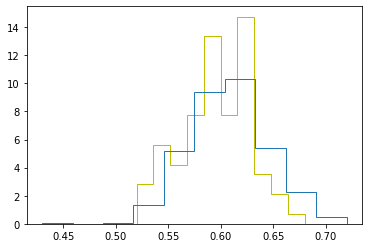

In [85]:
density = stats.gaussian_kde(nobel_hs)
plt.hist(nobel_hs,  histtype=u'step', density=True, label='nobel', color='y')

plt.hist(control_hs, histtype=u'step', density=True, label='control')



In [ ]:
nobel_probs, control_probs, = []
for h in range(30,80):
    divided = h/100
    n_n = [e for e in nobel_hs if e==divided]
    n_c = [e for e in contol_hs if c==divided]
    
    nobel_probs.append(n_n)
    control_probs.append(n_c)
    

{'whiskers': [<matplotlib.lines.Line2D at 0x7ff0483a4220>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff0483a47c0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff048407f10>,
 'medians': [<matplotlib.lines.Line2D at 0x7ff0483a4d60>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff0483c6070>,
 'means': []}

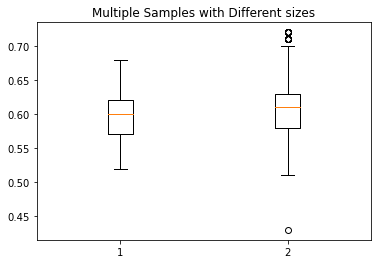

In [45]:
## probabilities

In [28]:
plt.plot(x, density(x))
#Adding the aesthetics
plt.title('Chart title')
plt.xlabel('X axis title')
plt.ylabel('Y axis title') 
#Show the plot
plt.show()

NameError: name 'density' is not defined